In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo Excel
df = pd.read_excel("Emociones_super_revisadas_test_II.xlsx")

In [8]:
# Mostrar las primeras filas
print("👀 Primeras filas del dataset:")
print(df.head())

👀 Primeras filas del dataset:
   id                  comment_id     video_id  categoria  topic  \
0 NaN  UgxRH0jIGY_fZltQh0N4AaABAg  aeAUIcnA-qY  Palestina      0   
1 NaN  UgzZM9sO08F5RevEylZ4AaABAg  zh6RXKAr8LI  Palestina      0   
2 NaN  UgyHwJbRd5nHaMQ4cXZ4AaABAg  VHq8KDAjYGs  Palestina      0   
3 NaN  UgztlQgjOZ7YvhJOU994AaABAg  G0rLG4Yu69M  Palestina      0   
4 NaN  Ugzo4glJSYKJjoiqBIx4AaABAg  G0rLG4Yu69M  Palestina      0   

                                                text   emotion  longitud  
0  Nora & Ali are such strong courageous people f...  Tristeza       203  
1  Thank you for the information....... 👍.\nFREE ...  Tristeza        84  
2  Anthony Bourdain 😇🥰Showed us the FactsTruths i...  Tristeza        79  
3  Such sadness; such tragedy! \nRIP to this lead...  Tristeza        65  
4   Hope the resistance leaders are more careful.\n😢  Tristeza        47  


In [ ]:
# Mostrar info general
print("\nℹ️ Información general:")
print(df.info())


ℹ️ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          236 non-null    float64
 1   comment_id  2283 non-null   object 
 2   video_id    2283 non-null   object 
 3   categoria   2283 non-null   object 
 4   topic       2283 non-null   int64  
 5   text        2283 non-null   object 
 6   emotion     2283 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 125.0+ KB
None


In [9]:
# Verificar valores nulos
print("\n🔎 Valores nulos por columna:")
print(df.isnull().sum())


🔎 Valores nulos por columna:
id            2047
comment_id       0
video_id         0
categoria        0
topic            0
text             0
emotion          0
longitud         0
dtype: int64


In [3]:
# Ver distribución de emociones
print("\n📊 Distribución de emociones:")
print(df["emotion"].value_counts())


📊 Distribución de emociones:
emotion
Ira            512
Tristeza       494
Esperanza      454
Sarcasmo       453
Resistencia    370
Name: count, dtype: int64


In [12]:
print("\n📌 Tipos de datos por columna:")
print(df.dtypes)




📌 Tipos de datos por columna:
id            float64
comment_id     object
video_id       object
categoria      object
topic           int64
text           object
emotion        object
longitud        int64
dtype: object


In [5]:
# Sample de un comentario por cada emoción
columnas_relevantes = ["comment_id", "video_id", "text", "emotion"]

if all(col in df.columns for col in columnas_relevantes):
    df_sample = df[columnas_relevantes].groupby("emotion").sample(n=1, random_state=42).reset_index(drop=True)
    print("\n🎯 Ejemplo representativo por emoción:")
    display(df_sample)
else:
    print("\n⚠️ Las siguientes columnas no están en el DataFrame:")
    missing = [col for col in columnas_relevantes if col not in df.columns]
    print(missing)


🎯 Ejemplo representativo por emoción:


,comment_id,video_id,text,emotion
0,UgzPO6adFa5ka4dMqDd4AaABAg,cwoz4nczVvM,Lets hope and pray the Arabs unite..!!!,Esperanza
1,UgwY6GL6lkYf94cguS94AaABAg,8U_0spbkulM,History will not forgive Joe Biden for this.,Ira
2,UgzR_yY4bvzGeyysXWp4AaABAg,Bru49L0epiA,"From the sea to the river, THE GOD of Israel w...",Resistencia
3,Ugz-rarr0ddrrXL3JHZ4AaABAg,PBDGrqq-M-E,Is that mini shredder man ? \nHe’s nuts,Sarcasmo
4,Ugys-dCQP5kzIW4tikV4AaABAg,WgCYqQBNsT8,This is out of control. Israhell unleashed an...,Tristeza


In [7]:
for emo in df['emotion'].unique():
    print(f"\n🔹 Ejemplos de emoción: {emo}")
    display(df[df['emotion'] == emo].sample(3, random_state=1)[['text']])



🔹 Ejemplos de emoción: Tristeza


,text
355,Whst security do iran has..?? \nLeaders are al...
107,Hiding the truth!😢
165,Stop genocide in GAZA 😢😢😢 Save the humanity 😢😢...



🔹 Ejemplos de emoción: Esperanza


,text
526,Praying for Wisdom. May God give you what you ...
605,Allah contineously blessings and cares on all ...
836,Don't worry Palestine One Day you will be free...



🔹 Ejemplos de emoción: Ira


,text
961,He is sick dictator.Never trust him.He support...
1631,lies and lies and lies again pushed by turkish...
1569,Shame on western double standards and hypocrisy



🔹 Ejemplos de emoción: Resistencia


,text
1327,Resisting the illegal occupation
1158,The resilience of the people of the land ❤ you...
1300,"""The Brave shall inherit the Earth."" Stay uni..."



🔹 Ejemplos de emoción: Sarcasmo


,text
1895,"The goys call it ""humanitarian""\nBut in fact i..."
1979,"Uh, why would someone who’s losing keep diggin..."
1054,He will be put in jail by Erdo soon.😂🤣😅😆😁


In [6]:

# Análisis de longitud de comentarios
df["longitud"] = df["text"].astype(str).apply(len)
print("\n📏 Estadísticas de longitud de comentarios:")
print(df["longitud"].describe())


📏 Estadísticas de longitud de comentarios:
count    2283.000000
mean       91.337276
std        63.238667
min        12.000000
25%        45.000000
50%        74.000000
75%       119.000000
max       395.000000
Name: longitud, dtype: float64


In [19]:
# Duplicados exactos
print(f"\n🧬 Filas duplicadas completas: {df.duplicated().sum()}")

# Duplicados por texto
print(f"🔁 Duplicados por texto en la columna 'text': {df.duplicated(subset=['text']).sum()}")

# Duplicados por texto pero con emociones distintas
duplicados_conflictivos = df.duplicated(subset=['text', 'emotion'], keep=False) & \
                          ~df.duplicated(subset=['text'], keep=False)
print(f"😵‍ Duplicados con emociones distintas: {df[duplicados_conflictivos].shape[0]}")



🧬 Filas duplicadas completas: 0
🔁 Duplicados por texto en la columna 'text': 0
😵‍ Duplicados con emociones distintas: 0


In [20]:
df["longitud_texto_calculada"] = df["text"].astype(str).apply(len)

print("\n📏 Estadísticas de longitud del texto:")
print(df["longitud_texto_calculada"].describe())

print("\n⚠️ Textos con menos de 10 caracteres:")
print(df[df["longitud_texto_calculada"] < 10]["text"])



📏 Estadísticas de longitud del texto:
count    2283.000000
mean       91.337276
std        63.238667
min        12.000000
25%        45.000000
50%        74.000000
75%       119.000000
max       395.000000
Name: longitud_texto_calculada, dtype: float64

⚠️ Textos con menos de 10 caracteres:
Series([], Name: text, dtype: object)


In [22]:
# Agrupar por texto y contar cuántas emociones distintas hay por comentario
comentarios_con_emociones_diferentes = df.groupby("text")["emotion"].nunique()

# Filtrar aquellos comentarios que tienen más de 1 emoción asignada
comentarios_conflictivos = comentarios_con_emociones_diferentes[comentarios_con_emociones_diferentes > 1]
print(f"⚠️ Comentarios con emociones distintas: {len(comentarios_conflictivos)}")

# Mostrar ejemplos concretos
print("\n🔍 Ejemplos de comentarios conflictivos:")
comentarios_sample = comentarios_conflictivos.head(5).index.tolist()
print(df[df["text"].isin(comentarios_sample)][["text", "emotion"]].sort_values("text"))


⚠️ Comentarios con emociones distintas: 0

🔍 Ejemplos de comentarios conflictivos:
Empty DataFrame
Columns: [text, emotion]
Index: []


In [23]:
# Textos vacíos o espacios en blanco
textos_vacios = df["text"].astype(str).str.strip() == ""
print(f"🕳️ Textos vacíos o en blanco: {textos_vacios.sum()}")


🕳️ Textos vacíos o en blanco: 0


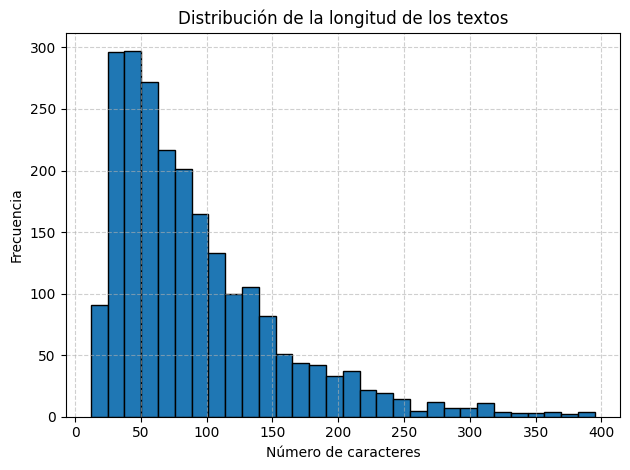

In [24]:
import matplotlib.pyplot as plt

plt.hist(df["text"].astype(str).apply(len), bins=30, edgecolor='black')
plt.title("Distribución de la longitud de los textos")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:
# Por categoría
print("\n📊 Conteo de emociones por 'categoria':")
print(df.groupby("categoria")["emotion"].value_counts())

# Por tópico
print("\n📊 Conteo de emociones por 'topic':")
print(df.groupby("topic")["emotion"].value_counts())



📊 Conteo de emociones por 'categoria':
categoria                    emotion    
Internacional                Sarcasmo       184
                             Ira            149
                             Esperanza       75
                             Resistencia     74
                             Tristeza        56
Internacional Medio Oriente  Tristeza       197
                             Ira            166
                             Sarcasmo       165
                             Resistencia    141
                             Esperanza      138
Israel                       Esperanza      155
                             Ira            110
                             Resistencia     87
                             Tristeza        78
                             Sarcasmo        65
Palestina                    Tristeza       163
                             Ira             87
                             Esperanza       86
                             Resistencia     68
       

In [26]:
print("\n🔍 Registros con texto pero sin emoción asignada:")
print(df[df["text"].notnull() & df["emotion"].isnull()].shape[0])



🔍 Registros con texto pero sin emoción asignada:
0


In [27]:
# Repetidos por texto + emoción, pero en diferentes tópicos
repetidos = df.duplicated(subset=["text", "emotion"], keep=False)
agrupados = df[repetidos].groupby("text")["topic"].nunique()
comentarios_reusados_en_varios_topicos = agrupados[agrupados > 1]
print(f"♻️ Comentarios que se repiten con la misma emoción en varios tópicos: {len(comentarios_reusados_en_varios_topicos)}")


♻️ Comentarios que se repiten con la misma emoción en varios tópicos: 0


In [28]:
!pip install transformers --quiet


In [29]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [30]:
# Calcular número de tokens por texto
df["n_tokens"] = df["text"].astype(str).apply(lambda x: len(tokenizer.tokenize(x)))

# Estadísticas generales
print("\n📏 Estadísticas de número de tokens:")
print(df["n_tokens"].describe())

# Porcentaje que excede el límite de RoBERTa base (512 tokens)
exceden_limite = df[df["n_tokens"] > 512].shape[0]
total = df.shape[0]
print(f"\n⚠️ Comentarios que exceden 512 tokens: {exceden_limite} ({exceden_limite/total:.2%})")



📏 Estadísticas de número de tokens:
count    2283.000000
mean       24.238283
std        18.775303
min         3.000000
25%        12.000000
50%        19.000000
75%        31.000000
max       338.000000
Name: n_tokens, dtype: float64

⚠️ Comentarios que exceden 512 tokens: 0 (0.00%)


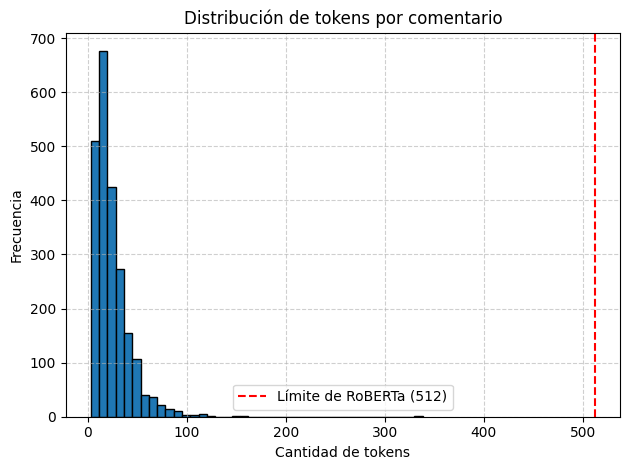

In [31]:
import matplotlib.pyplot as plt

plt.hist(df["n_tokens"], bins=40, edgecolor='black')
plt.axvline(512, color='red', linestyle='--', label='Límite de RoBERTa (512)')
plt.title("Distribución de tokens por comentario")
plt.xlabel("Cantidad de tokens")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [32]:
# Conteo absoluto
conteo = df["emotion"].value_counts()
print("📊 Distribución de emociones:")
print(conteo)

# Porcentaje por clase
porcentaje = df["emotion"].value_counts(normalize=True) * 100
print("\n📈 Porcentaje por emoción:")
print(porcentaje.round(2))


📊 Distribución de emociones:
emotion
Ira            512
Tristeza       494
Esperanza      454
Sarcasmo       453
Resistencia    370
Name: count, dtype: int64

📈 Porcentaje por emoción:
emotion
Ira            22.43
Tristeza       21.64
Esperanza      19.89
Sarcasmo       19.84
Resistencia    16.21
Name: proportion, dtype: float64


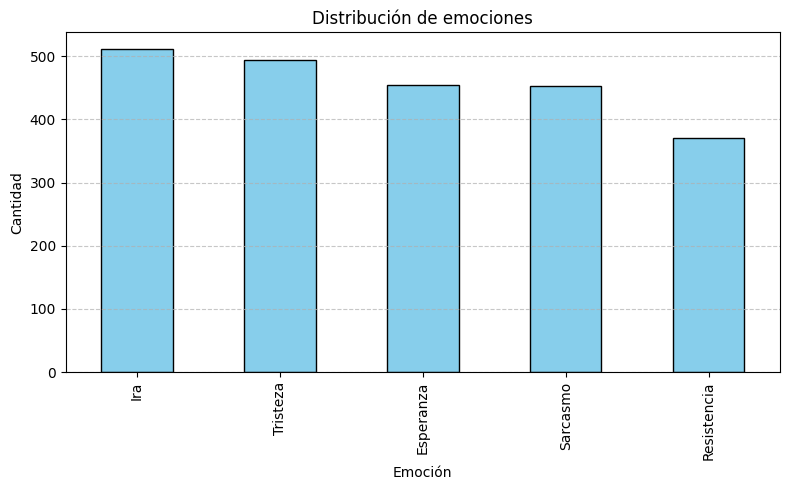

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
conteo.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de emociones")
plt.xlabel("Emoción")
plt.ylabel("Cantidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
!pip install nltk spacy --quiet
!python -m spacy download en_core_web_sm


2025-06-09 18:55:43.490706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-09 18:55:43.490761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-09 18:55:43.492590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 18:55:43.501107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-09 18:55:44.499341: W tensorflow/compiler/tf2

In [35]:
import re
import string
import spacy
import nltk
from nltk.corpus import stopwords

# Descargar recursos
nltk.download("stopwords")
stopwords_en = set(stopwords.words("english"))
nlp = spacy.load("en_core_web_sm")

# Función de limpieza
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r"http\S+|www\S+", "", texto)              # eliminar URLs
    texto = re.sub(r"[^\w\s]", "", texto)                     # eliminar puntuación y emojis
    texto = re.sub(r"\d+", "", texto)                         # eliminar números
    texto = texto.strip()

    # Lematización y eliminación de stopwords
    doc = nlp(texto)
    tokens_limpios = [token.lemma_ for token in doc if token.text not in stopwords_en and len(token.text) > 2]
    return " ".join(tokens_limpios)

# Crear nueva columna con texto limpio
df["text_clean"] = df["text"].apply(limpiar_texto)

# Mostrar ejemplo
print("\n🔍 Texto original:")
print(df["text"].iloc[0])
print("\n🧼 Texto limpio:")
print(df["text_clean"].iloc[0])


2025-06-09 18:55:59.472470: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-09 18:55:59.472549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-09 18:55:59.474216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 18:55:59.483681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-09 18:56:00.479125: W tensorflow/compiler/tf2


🔍 Texto original:
Nora & Ali are such strong courageous people for relentlessly bringing us up to date relevant news.
Often shocking and very sad.
Please take care of yourselves but please keep up your essential work 🇵🇸✊.

🧼 Texto limpio:
nora ali strong courageous people relentlessly bring date relevant news often shocking sad please take care please keep essential work


In [36]:
!pip install wordcloud --quiet


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Concatenar todos los textos por emoción
textos_por_emocion = df.groupby("emotion")["text_clean"].apply(lambda x: " ".join(x)).reset_index()

# Aplicar TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(textos_por_emocion["text_clean"])

# Convertir a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), index=textos_por_emocion["emotion"], columns=vectorizer.get_feature_names_out())


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


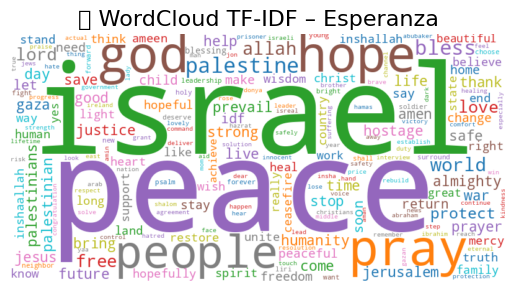

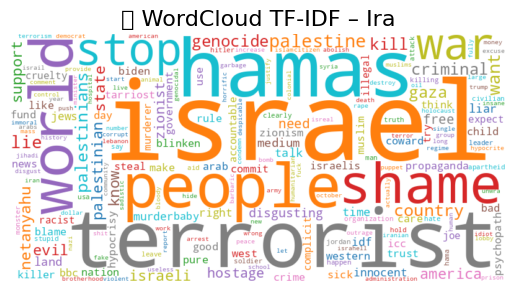

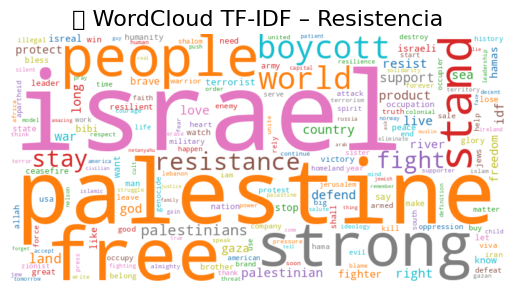

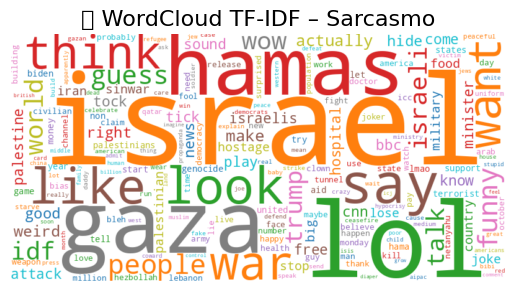

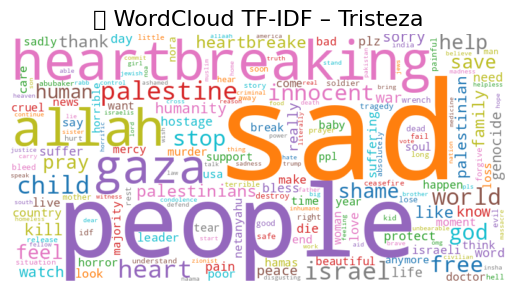

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear una WordCloud por emoción usando los pesos TF-IDF
for emocion in tfidf_df.index:
    tfidf_emocion = tfidf_df.loc[emocion]
    palabras_pesos = tfidf_emocion.to_dict()
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='tab10'
    ).generate_from_frequencies(palabras_pesos)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"🧠 WordCloud TF-IDF – {emocion}", fontsize=16)
    plt.show()


In [39]:
top_n = 10  # Número de palabras a mostrar por emoción

for emocion in tfidf_df.index:
    print(f"\n🧠 Palabras más representativas en '{emocion}':")
    
    # Obtener top N palabras con mayor puntaje TF-IDF para esta emoción
    top_palabras = tfidf_df.loc[emocion].sort_values(ascending=False).head(top_n)
    
    for palabra, peso in top_palabras.items():
        print(f"  {palabra}: {peso:.4f}")



🧠 Palabras más representativas en 'Esperanza':
  peace: 0.3618
  israel: 0.3382
  god: 0.2941
  hope: 0.2823
  pray: 0.2817
  people: 0.2294
  palestine: 0.2000
  bless: 0.1901
  world: 0.1500
  allah: 0.1447

🧠 Palabras más representativas en 'Ira':
  israel: 0.5459
  terrorist: 0.2574
  hamas: 0.2535
  people: 0.1755
  world: 0.1677
  shame: 0.1589
  stop: 0.1404
  war: 0.1365
  palestine: 0.1287
  lie: 0.1209

🧠 Palabras más representativas en 'Resistencia':
  israel: 0.5621
  palestine: 0.3523
  free: 0.3260
  strong: 0.2475
  people: 0.2286
  stand: 0.1462
  boycott: 0.1422
  world: 0.1349
  resistance: 0.1274
  stay: 0.1237

🧠 Palabras más representativas en 'Sarcasmo':
  israel: 0.4225
  lol: 0.2865
  gaza: 0.1950
  hamas: 0.1690
  say: 0.1625
  look: 0.1560
  like: 0.1495
  war: 0.1365
  want: 0.1300
  think: 0.1300

🧠 Palabras más representativas en 'Tristeza':
  sad: 0.3367
  people: 0.3159
  heartbreaking: 0.2455
  allah: 0.2192
  gaza: 0.1872
  palestine: 0.1833
  heart: 0

In [40]:
# Número de palabras únicas por emoción dividido entre total de palabras
diversidad = {}

for emocion in df["emotion"].unique():
    tokens = " ".join(df[df["emotion"] == emocion]["text_clean"]).split()
    if tokens:
        diversidad[emocion] = len(set(tokens)) / len(tokens)

print("\n📚 Diversidad léxica por emoción:")
for emocion, ratio in diversidad.items():
    print(f"{emocion}: {ratio:.3f}")



📚 Diversidad léxica por emoción:
Tristeza: 0.333
Esperanza: 0.295
Ira: 0.368
Resistencia: 0.335
Sarcasmo: 0.447


In [41]:
print("\n📏 Tokens promedio por emoción:")
print(df.groupby("emotion")["n_tokens"].mean().round(2))



📏 Tokens promedio por emoción:
emotion
Esperanza      28.45
Ira            21.84
Resistencia    23.70
Sarcasmo       19.65
Tristeza       27.47
Name: n_tokens, dtype: float64


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

emociones = df["emotion"].unique()

for emocion in emociones:
    print(f"\n🔗 Bigramas más comunes en '{emocion}':")

    # Filtrar textos por emoción
    textos = df[df["emotion"] == emocion]["text_clean"]
    
    # Vectorizar bigramas
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
    X = vectorizer.fit_transform(textos)
    
    # Sumar y ordenar los bigramas más frecuentes
    bigramas = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
    
    # Mostrar resultados
    for bigrama, freq in bigramas.items():
        print(f"  {bigrama}: {freq}")



🔗 Bigramas más comunes en 'Tristeza':
  free palestine: 15
  innocent people: 11
  heart break: 8
  god bless: 7
  god help: 7
  palestinian people: 7
  free free: 6
  woman child: 6
  stop war: 6
  feel sorry: 5
  palestinian child: 5
  need stop: 5
  people gaza: 4
  people suffer: 4
  plz help: 4
  sorry loss: 4
  israel stop: 4
  innocent child: 4
  zionist control: 4
  people palestine: 3

🔗 Bigramas más comunes en 'Esperanza':
  god bless: 22
  pray peace: 21
  peace jerusalem: 14
  peace israel: 11
  bless israel: 10
  free palestine: 10
  pray israel: 10
  palestine free: 10
  stay strong: 9
  god almighty: 8
  israel people: 8
  jesus christ: 8
  live peace: 8
  bless protect: 8
  long live: 7
  lord god: 7
  israel pray: 7
  stop war: 7
  peace love: 6
  god protect: 6

🔗 Bigramas más comunes en 'Ira':
  war criminal: 10
  hamas terrorist: 9
  free palestine: 8
  pure evil: 6
  war crime: 6
  terrorist state: 6
  israel terrorist: 6
  apartheid state: 5
  shame israel: 5
  s

In [46]:
k = 3  # Cambia este valor si quieres más ejemplos

for emocion in df["emotion"].unique():
    subset = df[df["emotion"] == emocion].copy()
    mediana = subset["n_tokens"].median()
    subset["desviacion"] = (subset["n_tokens"] - mediana).abs()
    ejemplos = subset.sort_values("desviacion").head(k)
    
    print(f"\n🧾 Ejemplos cercanos a la mediana de '{emocion}':")
    for texto in ejemplos["text"]:
        print(f"  - {texto}")



🧾 Ejemplos cercanos a la mediana de 'Tristeza':
  - It’s shameful to be a U.S. citizen.🥺💔
  - How can Israel trust them😢😢
Anyone knows what is TAQQIYA?
  - Shame on world leaders as they have no heart no soul😢😢😢😢

🧾 Ejemplos cercanos a la mediana de 'Esperanza':
  - Stop supply weapons to Israel and you have different and peaceful Middle East where we can living to gather in harmony.
  - Epic decision by these young women. There is definitely hope for the future. Well done Mondoweiss!!!
  - May Allah Accept your works, and make it a means of acceptance and Guidance for the Ummah!

🧾 Ejemplos cercanos a la mediana de 'Ira':
  - Arab countries don’t want Palestinians living amongst them. Israel can learn from the Arabs.
  - Independence for Palestine... IDF are you proud of killing children and lying... you are cowardly soldiers
  - Israelis want to help Palestinians leave because they are going to take the land and not leave.

🧾 Ejemplos cercanos a la mediana de 'Resistencia':
  - Isra

In [82]:
# ✅ Módulo 1: Imports y configuración
import os, torch
import pandas as pd
import numpy as np
import random
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from transformers import set_seed

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
set_seed(SEED)

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\u2705 Dispositivo: {device}")


✅ Dispositivo: cuda


In [83]:
# ✅ Módulo 2: Carga de datos y preparación de clases
df = pd.read_excel("Emociones_super_revisadas_test_II.xlsx")
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["emotion"])
label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
id2label = {v: k for k, v in label2id.items()}

# Pesos por clase para manejar desbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df["label"]),
    y=df["label"]
)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\n📊 Pesos de clase:")
for k, v in zip(label_encoder.classes_, class_weights):
    print(f"{k}: {v:.2f}")




📊 Pesos de clase:
Esperanza: 1.01
Ira: 0.89
Resistencia: 1.23
Sarcasmo: 1.01
Tristeza: 0.92


In [84]:
# ✅ Módulo 3: Split estratificado
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
train_dataset = Dataset.from_pandas(df_train[["text", "label"]])
val_dataset = Dataset.from_pandas(df_val[["text", "label"]])

In [ ]:
# ✅ Módulo 4: Tokenización
from transformers import AutoTokenizer


nombre_modelo = "roberta-base"
nombre_salida = nombre_modelo.split("/")[-1].replace("-", "_")
output_dir = f"./resultados/{nombre_salida}_optuna"
os.makedirs(output_dir, exist_ok=True)

# Cargar tokenizer
tokenizer = AutoTokenizer.from_pretrained(nombre_modelo)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# Establecer formato para Trainer
tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
tokenized_val.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/1826 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

In [86]:
# ------------------ 5. CONFIGURAR MODELO Y CONFIG ------------------
from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    nombre_modelo,
    num_labels=len(label2id),
    id2label={int(k): v for k, v in id2label.items()},
    label2id={k: int(v) for k, v in label2id.items()}
)

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        nombre_modelo,
        config=config
    )


In [87]:
# ------------------ 6. CUSTOM TRAINER CON PESOS ------------------
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


In [88]:
# ------------------ 7. MÉTRICAS ------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)
from transformers import EvalPrediction

def compute_metrics(eval_pred: EvalPrediction):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    report = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in sorted(id2label.keys())],
        output_dict=True
    )
    metrics = {
        "accuracy": accuracy_score(labels, preds),
        "precision_macro": precision_score(labels, preds, average="macro"),
        "recall_macro": recall_score(labels, preds, average="macro"),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision_weighted": precision_score(labels, preds, average="weighted"),
        "recall_weighted": recall_score(labels, preds, average="weighted"),
        "f1_weighted": f1_score(labels, preds, average="weighted"),
    }
    for emocion, i in label2id.items():
        if emocion in report:
            metrics[f"eval_f1_{emocion.lower()}"] = report[emocion]["f1-score"]
    return metrics


In [89]:
# ------------------ 8. EARLY STOPPING ------------------
from transformers import EarlyStoppingCallback

early_stopping = EarlyStoppingCallback(early_stopping_patience=2)


In [90]:
# ------------------ 9. FUNCIÓN DE ARGUMENTOS DE ENTRENAMIENTO ------------------
from transformers import TrainingArguments

def build_args(best_hp=None):
    return TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        logging_strategy="epoch",
        num_train_epochs=best_hp["num_train_epochs"] if best_hp else 10,
        per_device_train_batch_size=best_hp["per_device_train_batch_size"] if best_hp else 8,
        per_device_eval_batch_size=8,
        learning_rate=best_hp["learning_rate"] if best_hp else 2e-5,
        weight_decay=best_hp["weight_decay"] if best_hp else 0.1,
        fp16=torch.cuda.is_available(),
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_macro",  # 🔥 CAMBIO IMPORTANTE
        greater_is_better=True,
        report_to="none",
        logging_dir=f"{output_dir}/logs",
        seed=SEED
    )


In [95]:
!pip install optuna --quiet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [91]:
# ------------------ 10. ESPACIO DE BÚSQUEDA OPTUNA ------------------
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }


In [96]:
args_temp = build_args()

trainer_temp = WeightedLossTrainer(
    model_init=model_init,
    args=args_temp,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

best_run = trainer_temp.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,  # ← Esta debe estar definida antes
    n_trials=5,
    compute_objective=lambda metrics: metrics["eval_f1_macro"],
    backend="optuna")




Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-06-09 19:56:11,319] A new study created in memory with name: no-name-ed939bf4-5b0a-47f0-86ca-897d6a50cfbc
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.877100,0.535087,0.846154,0.846939,0.789474,0.814371,0.884793,0.840263,0.841332,0.837528,0.836346,0.844530,0.840263,0.839193
2,0.389300,0.540681,0.852273,0.844660,0.805755,0.835165,0.909953,0.853392,0.854548,0.847747,0.849561,0.853899,0.853392,0.852130
3,0.206500,0.687075,0.857143,0.860104,0.791667,0.837989,0.920792,0.857768,0.856312,0.854128,0.853539,0.860033,0.857768,0.857176
4,0.086700,0.855587,0.847458,0.860104,0.822785,0.830601,0.926108,0.859956,0.857585,0.860188,0.857411,0.862823,0.859956,0.859967
5,0.032600,0.876158,0.874317,0.857143,0.810458,0.822857,0.917874,0.859956,0.856953,0.858259,0.856530,0.860916,0.859956,0.859332
6,0.020400,0.860009,0.855556,0.885572,0.831169,0.829545,0.926108,0.868709,0.865366,0.867052,0.865590,0.869280,0.868709,0.868411


[I 2025-06-09 19:58:51,317] Trial 0 finished with value: 0.8655900709915121 and parameters: {'learning_rate': 2.4163851432492634e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 6, 'weight_decay': 0.0464790329434587}. Best is trial 0 with value: 0.8655900709915121.
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassifica

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.934300,0.717742,0.773585,0.767568,0.715328,0.810256,0.864865,0.789934,0.800147,0.787110,0.786320,0.804586,0.789934,0.789885
2,0.575800,0.779130,0.847458,0.842640,0.824324,0.804124,0.909091,0.846827,0.847295,0.845692,0.845527,0.849866,0.846827,0.847359
3,0.369500,0.964484,0.817734,0.783069,0.717949,0.770186,0.897561,0.803063,0.805642,0.800989,0.797300,0.812379,0.803063,0.801664
4,0.153300,1.218955,0.766234,0.822917,0.744186,0.821053,0.912621,0.818381,0.826746,0.818873,0.813402,0.835341,0.818381,0.817943


[I 2025-06-09 20:01:28,282] Trial 1 finished with value: 0.8134020940428618 and parameters: {'learning_rate': 4.1414799613992946e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 8, 'weight_decay': 0.013392898465907743}. Best is trial 0 with value: 0.8655900709915121.
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassifi

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.969500,0.475571,0.868132,0.847291,0.781457,0.804734,0.899522,0.844639,0.842438,0.841063,0.840227,0.845703,0.844639,0.843621
2,0.416400,0.426958,0.852273,0.861538,0.812500,0.842697,0.926829,0.862144,0.859938,0.861971,0.859167,0.865488,0.862144,0.862145
3,0.240200,0.539955,0.860335,0.858586,0.782609,0.820809,0.926108,0.853392,0.850851,0.852111,0.849689,0.857324,0.853392,0.853737
4,0.148600,0.717665,0.850575,0.851675,0.812903,0.830409,0.926829,0.857768,0.856969,0.855381,0.854478,0.859996,0.857768,0.857224


[I 2025-06-09 20:03:15,716] Trial 2 finished with value: 0.854478240923257 and parameters: {'learning_rate': 1.2829895954813923e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 7, 'weight_decay': 0.01646147361398941}. Best is trial 0 with value: 0.8655900709915121.
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassifica

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.158200,0.529912,0.876404,0.805430,0.802721,0.760736,0.897561,0.831510,0.836341,0.827520,0.828571,0.835811,0.831510,0.830183
2,0.495200,0.457469,0.863636,0.821622,0.792899,0.842697,0.922330,0.851204,0.852993,0.853888,0.848637,0.860607,0.851204,0.851350
3,0.294900,0.450099,0.842105,0.865116,0.846154,0.845238,0.931373,0.868709,0.870945,0.866936,0.865997,0.872841,0.868709,0.867859
4,0.169200,0.475400,0.865169,0.861386,0.840764,0.840909,0.925373,0.868709,0.866518,0.868714,0.866720,0.870048,0.868709,0.868584
5,0.122300,0.473945,0.869565,0.858537,0.843537,0.839080,0.931373,0.870897,0.869636,0.868300,0.868418,0.870639,0.870897,0.870208


[I 2025-06-09 20:05:01,016] Trial 3 finished with value: 0.8684184453025734 and parameters: {'learning_rate': 1.448130806611366e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 5, 'weight_decay': 0.035917651206719296}. Best is trial 3 with value: 0.8684184453025734.
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassifi

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.840400,0.684982,0.815534,0.812834,0.718750,0.800000,0.929293,0.822757,0.831139,0.815246,0.815282,0.833603,0.822757,0.820810
2,0.461400,0.912729,0.814815,0.844920,0.794326,0.769231,0.906404,0.827133,0.846654,0.823980,0.825939,0.849714,0.827133,0.828981
3,0.241300,1.015778,0.858696,0.815534,0.779874,0.804878,0.915423,0.838074,0.838527,0.836813,0.834881,0.842955,0.838074,0.837871
4,0.124800,1.163766,0.814815,0.826667,0.794872,0.807229,0.917073,0.835886,0.844380,0.832127,0.832131,0.846281,0.835886,0.834873
5,0.070500,1.160517,0.847458,0.851282,0.789809,0.817680,0.921569,0.849015,0.845803,0.847684,0.845559,0.851467,0.849015,0.849102
6,0.033800,1.252557,0.850575,0.825688,0.813793,0.816092,0.916256,0.846827,0.849613,0.842490,0.844481,0.849312,0.846827,0.846426
7,0.006100,1.211156,0.864865,0.815920,0.811189,0.817680,0.921569,0.849015,0.847477,0.845902,0.846244,0.848108,0.849015,0.848137
8,0.002300,1.289293,0.870056,0.824645,0.811189,0.824859,0.922330,0.853392,0.854156,0.848935,0.850616,0.853903,0.853392,0.852713
9,0.000700,1.268355,0.850829,0.824121,0.810811,0.815642,0.917874,0.846827,0.844180,0.844536,0.843855,0.846071,0.846827,0.845905
10,0.000100,1.298485,0.865169,0.836538,0.821918,0.818182,0.922330,0.855580,0.854811,0.852142,0.852827,0.855369,0.855580,0.854802


[I 2025-06-09 20:11:39,928] Trial 4 finished with value: 0.8528273448705358 and parameters: {'learning_rate': 2.584177886636127e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 10, 'weight_decay': 0.027184091804114206}. Best is trial 3 with value: 0.8684184453025734.


In [97]:
# ------------------ 13. REENTRENAR CON LOS MEJORES HP ------------------
args = build_args(best_run.hyperparameters)

trainer = WeightedLossTrainer(
    model_init=model_init,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

trainer.train()


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should pr

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.158200,0.529912,0.876404,0.805430,0.802721,0.760736,0.897561,0.831510,0.836341,0.827520,0.828571,0.835811,0.831510,0.830183
2,0.495200,0.457469,0.863636,0.821622,0.792899,0.842697,0.922330,0.851204,0.852993,0.853888,0.848637,0.860607,0.851204,0.851350
3,0.294900,0.450099,0.842105,0.865116,0.846154,0.845238,0.931373,0.868709,0.870945,0.866936,0.865997,0.872841,0.868709,0.867859
4,0.169200,0.475400,0.865169,0.861386,0.840764,0.840909,0.925373,0.868709,0.866518,0.868714,0.866720,0.870048,0.868709,0.868584
5,0.122300,0.473945,0.869565,0.858537,0.843537,0.839080,0.931373,0.870897,0.869636,0.868300,0.868418,0.870639,0.870897,0.870208


TrainOutput(global_step=575, training_loss=0.4479562013045601, metrics={'train_runtime': 103.3702, 'train_samples_per_second': 88.323, 'train_steps_per_second': 5.563, 'total_flos': 1201134320348160.0, 'train_loss': 0.4479562013045601, 'epoch': 5.0})

In [98]:
# ------------------ 14. GUARDAR MEJORES HP ------------------
with open(f"{output_dir}/optuna_mejor_config.txt", "w") as f:
    f.write("🧪 Mejores hiperparámetros encontrados por Optuna:\n\n")
    for key, value in best_run.hyperparameters.items():
        f.write(f"{key}: {value}\n")


In [99]:
# ------------------ 15. GUARDAR MODELO Y TOKENIZER ------------------
trainer.model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"✅ Modelo entrenado y guardado en: {output_dir}")


✅ Modelo entrenado y guardado en: ./resultados/roberta_base_optuna


In [100]:
from sklearn.model_selection import train_test_split

# Asegúrate de hacerlo una sola vez si no lo tenías antes
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
test_dataset = Dataset.from_pandas(df_test[["text", "label"]])

# Tokenizar test
tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

In [101]:
predictions = trainer.predict(tokenized_test)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)


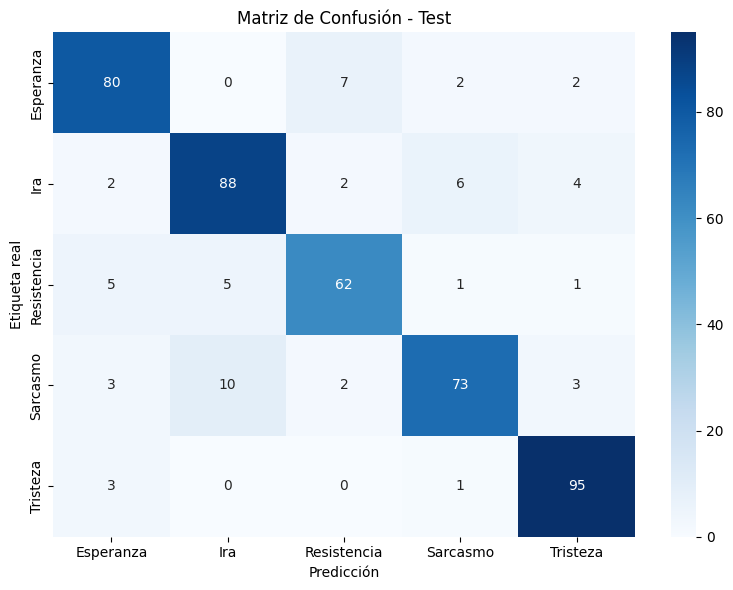

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Test")
plt.tight_layout()
plt.show()


In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

   Esperanza       0.86      0.88      0.87        91
         Ira       0.85      0.86      0.86       102
 Resistencia       0.85      0.84      0.84        74
    Sarcasmo       0.88      0.80      0.84        91
    Tristeza       0.90      0.96      0.93        99

    accuracy                           0.87       457
   macro avg       0.87      0.87      0.87       457
weighted avg       0.87      0.87      0.87       457



In [105]:
# Reconstruir DataFrame con resultados
df_resultados = pd.DataFrame({
    "text": df_test["text"].tolist(),
    "label_real": label_encoder.inverse_transform(y_true),
    "label_predicha": label_encoder.inverse_transform(y_pred),
})

df_resultados["acierto"] = df_resultados["label_real"] == df_resultados["label_predicha"]


In [106]:
df_resultados.to_csv(f"{output_dir}/predicciones_test_roberta.csv", index=False)
print(f"✅ CSV guardado en: {output_dir}/predicciones_test_roberta.csv")


✅ CSV guardado en: ./resultados/roberta_base_optuna/predicciones_test_roberta.csv


In [107]:
# Agrupamos por emoción real
resumen = df_resultados.groupby("label_real").agg(
    total=("acierto", "count"),
    aciertos=("acierto", "sum")
).reset_index()

# Calcular errores y precisión
resumen["errores"] = resumen["total"] - resumen["aciertos"]
resumen["precision_%"] = (resumen["aciertos"] / resumen["total"] * 100).round(2)

# Ordenar por precisión descendente
resumen = resumen.sort_values(by="precision_%", ascending=False)

# Mostrar tabla
print("\n📊 Desempeño por emoción:")
display(resumen)



📊 Desempeño por emoción:


,label_real,total,aciertos,errores,precision_%
4,Tristeza,99,95,4,95.96
0,Esperanza,91,80,11,87.91
1,Ira,102,88,14,86.27
2,Resistencia,74,62,12,83.78
3,Sarcasmo,91,73,18,80.22


In [108]:
resumen.to_csv(f"{output_dir}/resumen_precision_por_emocion.csv", index=False)
print(f"✅ Guardado: {output_dir}/resumen_precision_por_emocion.csv")


✅ Guardado: ./resultados/roberta_base_optuna/resumen_precision_por_emocion.csv


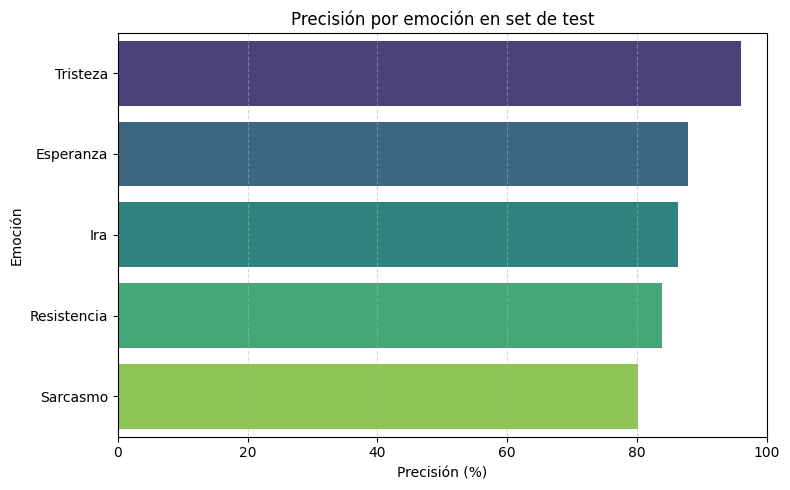

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de precisión
plt.figure(figsize=(8, 5))
sns.barplot(data=resumen, x="precision_%", y="label_real", palette="viridis")
plt.xlabel("Precisión (%)")
plt.ylabel("Emoción")
plt.title("Precisión por emoción en set de test")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [111]:
# Filtrar errores
errores = df_resultados[df_resultados["acierto"] == False]

# Tomar 3 errores por emoción real
ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)

# Mostrar
pd.set_option('display.max_colwidth', None)
display(ejemplos_por_clase[["label_real", "label_predicha", "text"]])


/tmp/ipykernel_38/4171709470.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)


,label_real,label_predicha,text
0,Esperanza,Resistencia,🙏 OUR HOLLY GOD 🙏\nProtect Israel people and land 🙏free our hostages save soon 🙏 protect and bless our leaders and All IDF .and lead them as you lead Moses and king Dived before 🙏🙏🙏
1,Esperanza,Tristeza,I can't believe this is actual real life in 2024. Thank you for your brave reporting and honest account of this absolute travesty. It is honestly heart breaking but we must bare witness of Israel's crimes against humanity. I only hope that one day there will be justice to the suffering of all Palestinians🙏
2,Esperanza,Resistencia,Never again is for all of mankind!
3,Ira,Tristeza,🤬 I can't even comprehend. It's just too fucking much.
4,Ira,Sarcasmo,Ugh!!! GAZZY? 🤢🤢🤢🤮🤮🤮🤮
5,Ira,Esperanza,Stop being a bully and all the horror you find will go away.
6,Resistencia,Esperanza,"SILENCE = Complicitiy, STAND UP, SPEAK UP so that when your children, your friends, your conscience ask WHAT did YOU do when a Genocide was happening, ALL will know, Your Heart and Soul will know YOU stood for JUSTICE, YOU were on the Right side of History... Free Palestine !!!"
7,Resistencia,Esperanza,I pray for Israel to win and clean the world from the evils from xamas.
8,Resistencia,Ira,Every one asking Isreal to stop fire on Gaza \nBut yet Russia has be firing on Ukraine for over a year now and nothing has been done to stop them \nBut yet You all want to force Israel to stop this war that she did not started
9,Sarcasmo,Tristeza,if this happens then bbc will be sad for weapons industry


In [112]:
ejemplos_por_clase.to_csv(f"{output_dir}/errores_por_emocion.csv", index=False)
print(f"⚠️ Errores guardados en: {output_dir}/errores_por_emocion.csv")


⚠️ Errores guardados en: ./resultados/roberta_base_optuna/errores_por_emocion.csv


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a los logs del entrenamiento
log_path = f"{output_dir}/logs/events.out.tfevents.*"


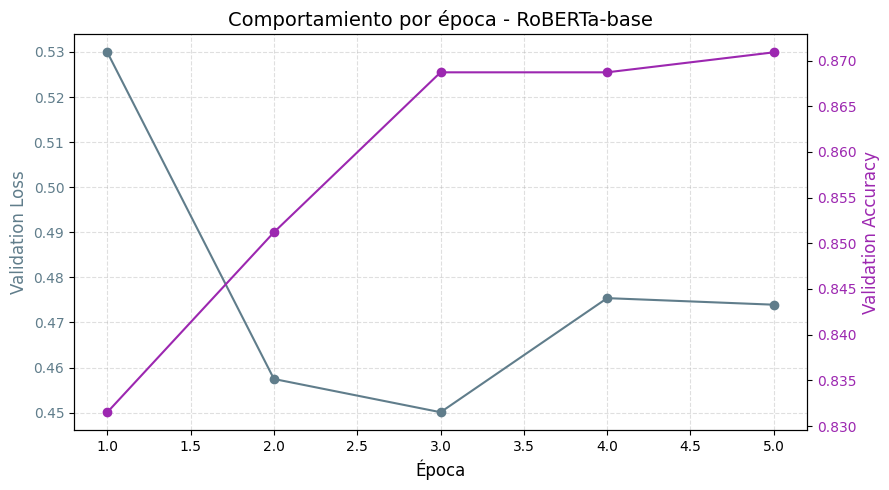

In [122]:
import json
import matplotlib.pyplot as plt

# Ruta absoluta del archivo (según tu estructura)
trainer_state_path = "./resultados/roberta_base_optuna/checkpoint-575/trainer_state.json"

# Leer el archivo
with open(trainer_state_path, "r") as f:
    state = json.load(f)

# Extraer métricas por época
logs = state["log_history"]

epochs = []
val_loss = []
val_accuracy = []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        val_accuracy.append(log.get("eval_accuracy", None))  # Solo si se calcula

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Validation Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, val_accuracy, marker='o', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("Comportamiento por época - RoBERTa-base", fontsize=14)
fig.tight_layout()
plt.show()

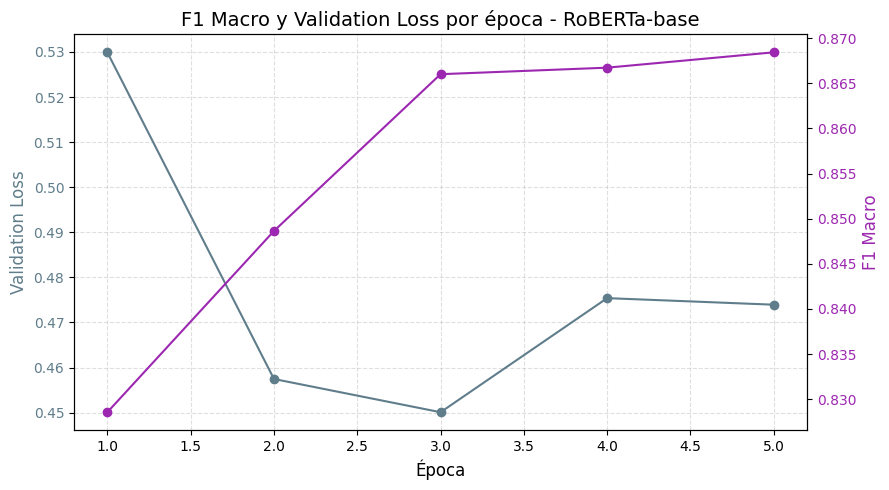

In [123]:
import matplotlib.pyplot as plt

# Extraer F1 macro desde logs
f1_macro = []
val_loss = []
epochs = []

for log in logs:
    if "eval_loss" in log and "eval_f1_macro" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1_macro.append(log["eval_f1_macro"])

# Crear figura
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1_macro, marker='o', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("F1 Macro y Validation Loss por época - RoBERTa-base", fontsize=14)
fig.tight_layout()
plt.show()


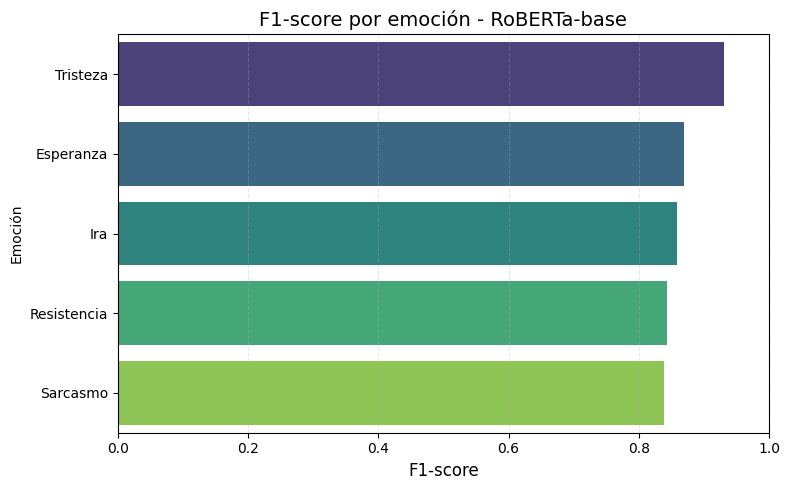

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir a DataFrame
df_f1 = pd.DataFrame(report).T
df_f1 = df_f1[df_f1.index.isin(label_encoder.classes_)]  # Solo emociones
df_f1 = df_f1.reset_index().rename(columns={"index": "Emoción", "f1-score": "F1"})

# Ordenar por F1 descendente
df_f1 = df_f1.sort_values(by="F1", ascending=False)

# 🎨 Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1, x="F1", y="Emoción", palette="viridis")

# Estilo
plt.title("F1-score por emoción - RoBERTa-base", fontsize=14)
plt.xlabel("F1-score", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [127]:
# Convertir el classification report en DataFrame
df_report = pd.DataFrame(report).T

# Filtrar solo las clases (emociones)
df_clases = df_report.loc[label_encoder.classes_].copy()

# Redondear métricas
df_clases = df_clases[["precision", "recall", "f1-score", "support"]].round(3)

# Ordenar por F1 descendente
df_clases = df_clases.sort_values(by="f1-score", ascending=False)

# Mostrar tabla
print("📊 Métricas por emoción - RoBERTa-base")
display(df_clases)


📊 Métricas por emoción - RoBERTa-base


,precision,recall,f1-score,support
Tristeza,0.905,0.960,0.931,99.0
Esperanza,0.860,0.879,0.870,91.0
Ira,0.854,0.863,0.859,102.0
Resistencia,0.849,0.838,0.844,74.0
Sarcasmo,0.880,0.802,0.839,91.0


In [128]:
df_clases.to_csv(f"{output_dir}/metricas_por_emocion.csv")
print(f"✅ Guardado en: {output_dir}/metricas_por_emocion.csv")


✅ Guardado en: ./resultados/roberta_base_optuna/metricas_por_emocion.csv


In [129]:
# ✅ Módulo 1: Imports y configuración
import os, torch
import pandas as pd
import numpy as np
import random
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from transformers import set_seed

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
set_seed(SEED)

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\u2705 Dispositivo: {device}")


✅ Dispositivo: cuda


In [130]:
# ✅ Módulo 2: Carga de datos y preparación de clases
df = pd.read_excel("Emociones_super_revisadas_test_II.xlsx")
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["emotion"])
label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
id2label = {v: k for k, v in label2id.items()}

# Pesos por clase para manejar desbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df["label"]),
    y=df["label"]
)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\n📊 Pesos de clase:")
for k, v in zip(label_encoder.classes_, class_weights):
    print(f"{k}: {v:.2f}")




📊 Pesos de clase:
Esperanza: 1.01
Ira: 0.89
Resistencia: 1.23
Sarcasmo: 1.01
Tristeza: 0.92


In [131]:
# ✅ Módulo 3: Split estratificado
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
train_dataset = Dataset.from_pandas(df_train[["text", "label"]])
val_dataset = Dataset.from_pandas(df_val[["text", "label"]])

In [132]:
# ✅ Módulo 4: Tokenización
from transformers import AutoTokenizer


nombre_modelo = "microsoft/deberta-v3-base"
nombre_salida = nombre_modelo.split("/")[-1].replace("-", "_")
output_dir = f"./resultados/{nombre_salida}_optuna"
os.makedirs(output_dir, exist_ok=True)

# Cargar tokenizer
tokenizer = AutoTokenizer.from_pretrained(nombre_modelo)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# Establecer formato para Trainer
tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
tokenized_val.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/1826 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

In [133]:
# ------------------ 5. CONFIGURAR MODELO Y CONFIG ------------------
from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    nombre_modelo,
    num_labels=len(label2id),
    id2label={int(k): v for k, v in id2label.items()},
    label2id={k: int(v) for k, v in label2id.items()}
)

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        nombre_modelo,
        config=config
    )


In [134]:
# ------------------ 6. CUSTOM TRAINER CON PESOS ------------------
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


In [135]:
# ------------------ 7. MÉTRICAS ------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)
from transformers import EvalPrediction

def compute_metrics(eval_pred: EvalPrediction):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    report = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in sorted(id2label.keys())],
        output_dict=True
    )
    metrics = {
        "accuracy": accuracy_score(labels, preds),
        "precision_macro": precision_score(labels, preds, average="macro"),
        "recall_macro": recall_score(labels, preds, average="macro"),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision_weighted": precision_score(labels, preds, average="weighted"),
        "recall_weighted": recall_score(labels, preds, average="weighted"),
        "f1_weighted": f1_score(labels, preds, average="weighted"),
    }
    for emocion, i in label2id.items():
        if emocion in report:
            metrics[f"eval_f1_{emocion.lower()}"] = report[emocion]["f1-score"]
    return metrics


In [136]:
# ------------------ 8. EARLY STOPPING ------------------
from transformers import EarlyStoppingCallback

early_stopping = EarlyStoppingCallback(early_stopping_patience=2)


In [137]:
# ------------------ 9. FUNCIÓN DE ARGUMENTOS DE ENTRENAMIENTO ------------------
from transformers import TrainingArguments

def build_args(best_hp=None):
    return TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        logging_strategy="epoch",
        num_train_epochs=best_hp["num_train_epochs"] if best_hp else 10,
        per_device_train_batch_size=best_hp["per_device_train_batch_size"] if best_hp else 8,
        per_device_eval_batch_size=8,
        learning_rate=best_hp["learning_rate"] if best_hp else 2e-5,
        weight_decay=best_hp["weight_decay"] if best_hp else 0.1,
        fp16=torch.cuda.is_available(),
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_macro",  # 🔥 CAMBIO IMPORTANTE
        greater_is_better=True,
        report_to="none",
        logging_dir=f"{output_dir}/logs",
        seed=SEED
    )

In [138]:
# ------------------ 10. ESPACIO DE BÚSQUEDA OPTUNA ------------------
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }

In [139]:
args_temp = build_args()

trainer_temp = WeightedLossTrainer(
    model_init=model_init,
    args=args_temp,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

best_run = trainer_temp.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,  # ← Esta debe estar definida antes
    n_trials=5,
    compute_objective=lambda metrics: metrics["eval_f1_macro"],
    backend="optuna")



pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['pooler.dense.bias', 'classifier.weight', 'classifier.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-06-09 20:55:10,987] A new study created in memory with name: no-name-d5bfca9f-cf1b-4f2c-b50a-b0214b5c7742
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['pooler.dense.bias', 'classifier.weight', 'classifier.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.854800,0.795368,0.836158,0.844037,0.784810,0.776316,0.909091,0.835886,0.844503,0.832187,0.830082,0.847559,0.835886,0.833485
2,0.552500,0.781543,0.853933,0.862944,0.802721,0.808511,0.931373,0.855580,0.852957,0.852111,0.851896,0.856534,0.855580,0.855383
3,0.331300,1.072107,0.868132,0.808163,0.808511,0.776316,0.896907,0.833698,0.858838,0.827226,0.831606,0.856127,0.833698,0.833044
4,0.196100,0.889028,0.860465,0.882353,0.812500,0.827586,0.921569,0.864333,0.862891,0.862924,0.860895,0.867909,0.864333,0.864273
5,0.077000,1.138088,0.839378,0.860104,0.788732,0.817204,0.910000,0.846827,0.846145,0.842990,0.843084,0.849534,0.846827,0.846687
6,0.055800,1.070946,0.853933,0.876847,0.832215,0.842697,0.912621,0.866521,0.864398,0.863844,0.863663,0.866453,0.866521,0.866007
7,0.035900,1.084385,0.860335,0.871287,0.845638,0.836957,0.920000,0.868709,0.866770,0.867139,0.866843,0.868856,0.868709,0.868670
8,0.023100,1.089304,0.865169,0.876847,0.843537,0.832432,0.925373,0.870897,0.869295,0.868418,0.868672,0.871068,0.870897,0.870796


[I 2025-06-09 21:03:49,924] Trial 0 finished with value: 0.8686717623386029 and parameters: {'learning_rate': 3.9322276816079594e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 8, 'weight_decay': 0.04685834086015076}. Best is trial 0 with value: 0.8686717623386029.
Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a Bert

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.864900,0.683018,0.776786,0.858696,0.546667,0.765101,0.917874,0.785558,0.803882,0.774115,0.773025,0.818884,0.785558,0.786043
2,0.403500,0.486100,0.857143,0.852018,0.800000,0.812500,0.935961,0.855580,0.863973,0.852266,0.851524,0.867397,0.855580,0.854931
3,0.198600,0.675113,0.842105,0.876190,0.761905,0.842697,0.923810,0.857768,0.863790,0.846741,0.849341,0.861474,0.857768,0.854544
4,0.121800,0.644496,0.902174,0.882353,0.836879,0.853933,0.927536,0.884026,0.883575,0.879320,0.880575,0.883749,0.884026,0.883065
5,0.037900,0.704556,0.910112,0.890995,0.857143,0.842105,0.937198,0.890591,0.890916,0.886807,0.887511,0.891394,0.890591,0.889594
6,0.020300,0.691494,0.893855,0.898551,0.843537,0.853933,0.935961,0.888403,0.886229,0.884697,0.885167,0.888066,0.888403,0.887927
7,0.007300,0.744525,0.897727,0.901408,0.845638,0.847059,0.941748,0.890591,0.890442,0.886333,0.886716,0.891985,0.890591,0.889561


[I 2025-06-09 21:08:05,957] Trial 1 finished with value: 0.8867159407338121 and parameters: {'learning_rate': 4.2139774200330226e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 7, 'weight_decay': 0.034366376302490974}. Best is trial 1 with value: 0.8867159407338121.
Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a Be

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.840100,0.570371,0.882682,0.853211,0.802548,0.819876,0.934673,0.862144,0.866269,0.859183,0.858598,0.869820,0.862144,0.861885
2,0.386000,0.803853,0.850299,0.890995,0.818182,0.842105,0.919431,0.868709,0.870033,0.864829,0.864203,0.872850,0.868709,0.867526
3,0.200300,0.846462,0.900000,0.881188,0.841379,0.832432,0.920792,0.877462,0.876266,0.874506,0.875158,0.877699,0.877462,0.877359
4,0.084200,0.941025,0.897727,0.897561,0.813333,0.845714,0.932692,0.881838,0.879222,0.877480,0.877406,0.882594,0.881838,0.881242
5,0.057800,0.985637,0.873563,0.896552,0.802548,0.835294,0.933333,0.873085,0.871461,0.869758,0.868258,0.876554,0.873085,0.872523
6,0.027200,1.034741,0.897727,0.894231,0.824324,0.832370,0.928230,0.879650,0.878192,0.875046,0.875376,0.880240,0.879650,0.878655


[I 2025-06-09 21:14:38,881] Trial 2 finished with value: 0.8753763947101337 and parameters: {'learning_rate': 1.7260033139288914e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 8, 'weight_decay': 0.05645679529247629}. Best is trial 1 with value: 0.8867159407338121.
Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a Bert

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.825100,0.527745,0.849462,0.854167,0.745342,0.825581,0.926108,0.844639,0.842547,0.842516,0.840132,0.850958,0.844639,0.845501
2,0.349600,0.653324,0.845238,0.862559,0.833333,0.852071,0.882883,0.857768,0.866782,0.852859,0.855217,0.865146,0.857768,0.856692
3,0.160400,0.678076,0.912088,0.883495,0.857143,0.849162,0.927536,0.888403,0.889741,0.883983,0.885885,0.888651,0.888403,0.887626
4,0.077800,0.831834,0.886364,0.876190,0.807692,0.821429,0.931373,0.868709,0.867731,0.865659,0.864610,0.871697,0.868709,0.868174
5,0.029900,0.832040,0.883721,0.899522,0.840000,0.862069,0.937799,0.888403,0.888049,0.884432,0.884622,0.890068,0.888403,0.887572


[I 2025-06-09 21:18:25,500] Trial 3 finished with value: 0.884622093982496 and parameters: {'learning_rate': 2.9152017031817086e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 6, 'weight_decay': 0.04045253925016082}. Best is trial 1 with value: 0.8867159407338121.
Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertF

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.085800,0.553451,0.821053,0.831050,0.657343,0.797468,0.941176,0.820569,0.820280,0.809288,0.809618,0.826078,0.820569,0.818101
2,0.389200,0.511909,0.843373,0.887805,0.782051,0.855491,0.925234,0.864333,0.864808,0.859780,0.858791,0.869686,0.864333,0.863507
3,0.214100,0.565721,0.906077,0.901961,0.849315,0.853933,0.936585,0.892779,0.890681,0.889152,0.889574,0.892315,0.892779,0.892193
4,0.114500,0.629405,0.901099,0.909091,0.849315,0.853801,0.941748,0.894967,0.893821,0.890461,0.891011,0.895116,0.894967,0.893885
5,0.078700,0.668128,0.910112,0.898551,0.847682,0.853801,0.937198,0.892779,0.891713,0.889747,0.889469,0.893934,0.892779,0.892077
6,0.039700,0.689048,0.903955,0.900990,0.842105,0.862069,0.928230,0.890591,0.889236,0.888023,0.887470,0.892162,0.890591,0.890196


[I 2025-06-09 21:22:53,618] Trial 4 finished with value: 0.8874697590033389 and parameters: {'learning_rate': 1.1490977529237664e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 6, 'weight_decay': 0.06309090934349716}. Best is trial 4 with value: 0.8874697590033389.


In [140]:
# ------------------ 13. REENTRENAR CON LOS MEJORES HP ------------------
args = build_args(best_run.hyperparameters)

trainer = WeightedLossTrainer(
    model_init=model_init,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

trainer.train()


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.085800,0.553451,0.821053,0.831050,0.657343,0.797468,0.941176,0.820569,0.820280,0.809288,0.809618,0.826078,0.820569,0.818101
2,0.389200,0.511909,0.843373,0.887805,0.782051,0.855491,0.925234,0.864333,0.864808,0.859780,0.858791,0.869686,0.864333,0.863507
3,0.214100,0.565721,0.906077,0.901961,0.849315,0.853933,0.936585,0.892779,0.890681,0.889152,0.889574,0.892315,0.892779,0.892193
4,0.114500,0.629405,0.901099,0.909091,0.849315,0.853801,0.941748,0.894967,0.893821,0.890461,0.891011,0.895116,0.894967,0.893885
5,0.078700,0.668128,0.910112,0.898551,0.847682,0.853801,0.937198,0.892779,0.891713,0.889747,0.889469,0.893934,0.892779,0.892077
6,0.039700,0.689048,0.903955,0.900990,0.842105,0.862069,0.928230,0.890591,0.889236,0.888023,0.887470,0.892162,0.890591,0.890196


TrainOutput(global_step=1374, training_loss=0.32034292387650004, metrics={'train_runtime': 268.8332, 'train_samples_per_second': 40.754, 'train_steps_per_second': 5.111, 'total_flos': 1441387032864768.0, 'train_loss': 0.32034292387650004, 'epoch': 6.0})

In [141]:
# ------------------ 14. GUARDAR MEJORES HP ------------------
with open(f"{output_dir}/optuna_mejor_config.txt", "w") as f:
    f.write("🧪 Mejores hiperparámetros encontrados por Optuna:\n\n")
    for key, value in best_run.hyperparameters.items():
        f.write(f"{key}: {value}\n")


In [142]:
# ------------------ 15. GUARDAR MODELO Y TOKENIZER ------------------
trainer.model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"✅ Modelo entrenado y guardado en: {output_dir}")


✅ Modelo entrenado y guardado en: ./resultados/deberta_v3_base_optuna


In [143]:
from sklearn.model_selection import train_test_split

# Asegúrate de hacerlo una sola vez si no lo tenías antes
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
test_dataset = Dataset.from_pandas(df_test[["text", "label"]])

# Tokenizar test
tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
predictions = trainer.predict(tokenized_test)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

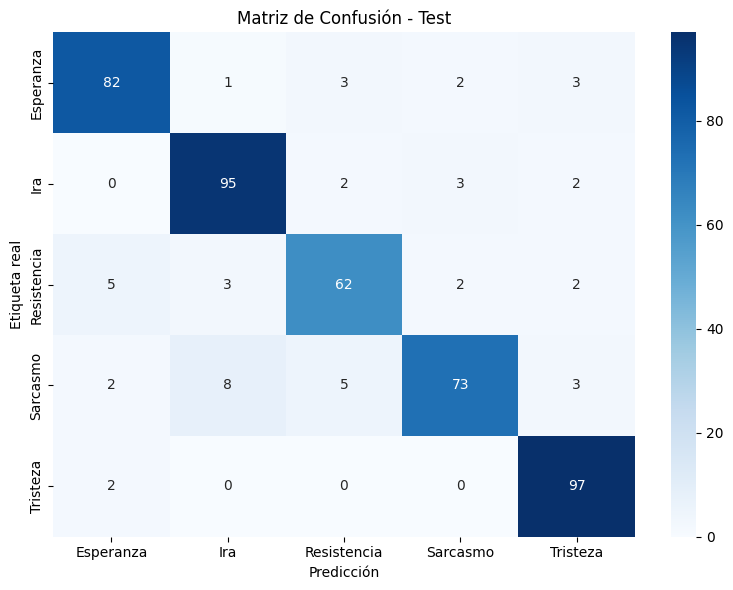

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Test")
plt.tight_layout()
plt.show()


In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

   Esperanza       0.90      0.90      0.90        91
         Ira       0.89      0.93      0.91       102
 Resistencia       0.86      0.84      0.85        74
    Sarcasmo       0.91      0.80      0.85        91
    Tristeza       0.91      0.98      0.94        99

    accuracy                           0.89       457
   macro avg       0.89      0.89      0.89       457
weighted avg       0.90      0.89      0.89       457



In [146]:
# Reconstruir DataFrame con resultados
df_resultados = pd.DataFrame({
    "text": df_test["text"].tolist(),
    "label_real": label_encoder.inverse_transform(y_true),
    "label_predicha": label_encoder.inverse_transform(y_pred),
})

df_resultados["acierto"] = df_resultados["label_real"] == df_resultados["label_predicha"]

df_resultados.to_csv(f"{output_dir}/predicciones_test_deberta.csv", index=False)
print(f"✅ CSV guardado en: {output_dir}/predicciones_test_deberta.csv")


✅ CSV guardado en: ./resultados/deberta_v3_base_optuna/predicciones_test_deberta.csv


In [147]:
# Agrupamos por emoción real
resumen = df_resultados.groupby("label_real").agg(
    total=("acierto", "count"),
    aciertos=("acierto", "sum")
).reset_index()

# Calcular errores y precisión
resumen["errores"] = resumen["total"] - resumen["aciertos"]
resumen["precision_%"] = (resumen["aciertos"] / resumen["total"] * 100).round(2)

# Ordenar por precisión descendente
resumen = resumen.sort_values(by="precision_%", ascending=False)

# Mostrar tabla
print("\n📊 Desempeño por emoción:")
display(resumen)



📊 Desempeño por emoción:


,label_real,total,aciertos,errores,precision_%
4,Tristeza,99,97,2,97.98
1,Ira,102,95,7,93.14
0,Esperanza,91,82,9,90.11
2,Resistencia,74,62,12,83.78
3,Sarcasmo,91,73,18,80.22


In [148]:
resumen.to_csv(f"{output_dir}/resumen_precision_por_emocion.csv", index=False)
print(f"✅ Guardado: {output_dir}/resumen_precision_por_emocion.csv")


✅ Guardado: ./resultados/deberta_v3_base_optuna/resumen_precision_por_emocion.csv


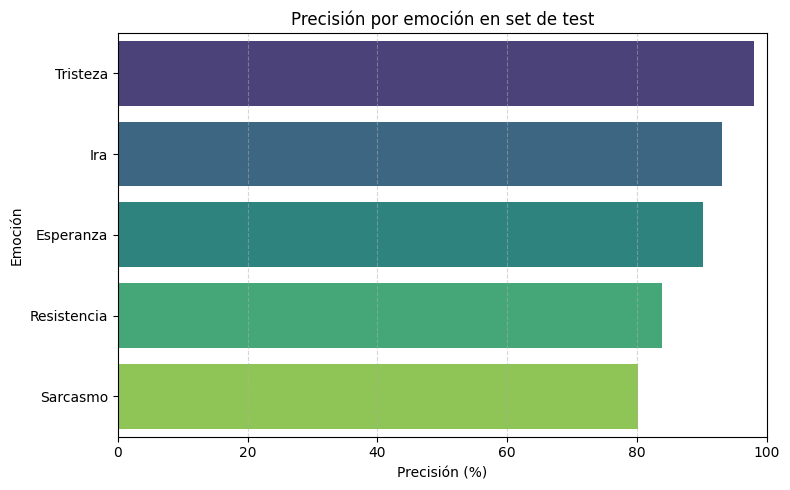

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de precisión
plt.figure(figsize=(8, 5))
sns.barplot(data=resumen, x="precision_%", y="label_real", palette="viridis")
plt.xlabel("Precisión (%)")
plt.ylabel("Emoción")
plt.title("Precisión por emoción en set de test")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [150]:
# Filtrar errores
errores = df_resultados[df_resultados["acierto"] == False]

# Tomar 3 errores por emoción real
ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)

# Mostrar
pd.set_option('display.max_colwidth', None)
display(ejemplos_por_clase[["label_real", "label_predicha", "text"]])


/tmp/ipykernel_38/4171709470.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)


,label_real,label_predicha,text
0,Esperanza,Tristeza,"May God Almighty protect all the ISRAEL and all the Jewish people and all the IDF soldiers are fighting for their lives in all corners, they live surrounded by their enemies. praying for ISRAEL HOSTAGES. LORD JESUS Bring them home safely. My heart breaks for ISRAEL and their people."
1,Esperanza,Ira,"ICJ, UN, UNRWA for Nobel Peace Prize!"
2,Esperanza,Sarcasmo,Can you be a non-Jew and be a Zionist at the same time? Because then I'm that mess. I do hope your government reins in the West Bank settlements though. Am Yisrael chai
3,Ira,Tristeza,This is Unacceptable absolutely Barbaric upsetting horrific truly Sickening Disturbing STOP THIS GENOCIDE NOW..stop these Psycopaths in uniforms with Guns oh my days this is heartbreaking horrific
4,Ira,Tristeza,Israeli was murdered while Palestinian died. What a shame journalist use of words.
5,Ira,Sarcasmo,Ugh!!! GAZZY? 🤢🤢🤢🤮🤮🤮🤮
6,Resistencia,Esperanza,I pray for Israel to win and clean the world from the evils from xamas.
7,Resistencia,Sarcasmo,Let you in on a little secret guys...it ain't over.
8,Resistencia,Ira,Every one asking Isreal to stop fire on Gaza \nBut yet Russia has be firing on Ukraine for over a year now and nothing has been done to stop them \nBut yet You all want to force Israel to stop this war that she did not started
9,Sarcasmo,Resistencia,Terrorists every where 😊. Love for Israel ❤


In [151]:
ejemplos_por_clase.to_csv(f"{output_dir}/errores_por_emocion.csv", index=False)
print(f"⚠️ Errores guardados en: {output_dir}/errores_por_emocion.csv")


⚠️ Errores guardados en: ./resultados/deberta_v3_base_optuna/errores_por_emocion.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a los logs del entrenamiento
log_path = f"{output_dir}/logs/events.out.tfevents.*"


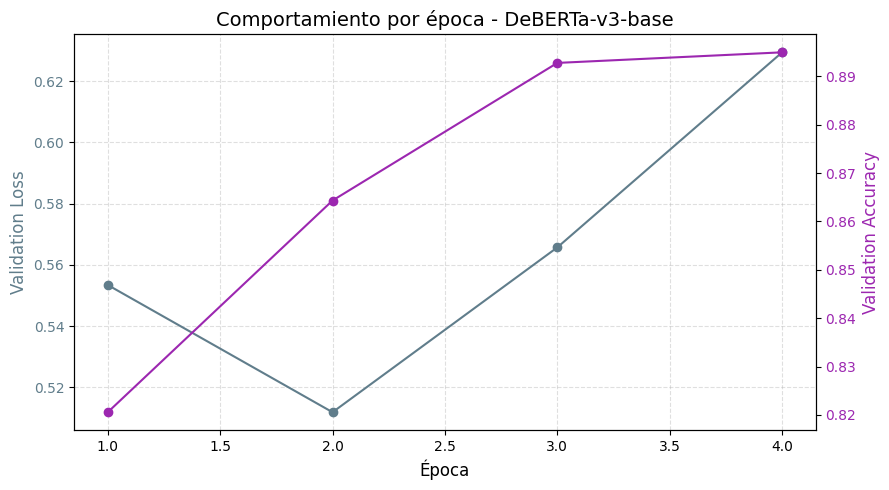

In [152]:
import json
import matplotlib.pyplot as plt

# Ruta absoluta del archivo (según tu estructura)
trainer_state_path = "./resultados/deberta_v3_base_optuna/checkpoint-916/trainer_state.json"

# Leer el archivo
with open(trainer_state_path, "r") as f:
    state = json.load(f)

# Extraer métricas por época
logs = state["log_history"]

epochs = []
val_loss = []
val_accuracy = []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        val_accuracy.append(log.get("eval_accuracy", None))  # Solo si se calcula

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Validation Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, val_accuracy, marker='o', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("Comportamiento por época - DeBERTa-v3-base", fontsize=14)
fig.tight_layout()
plt.show()

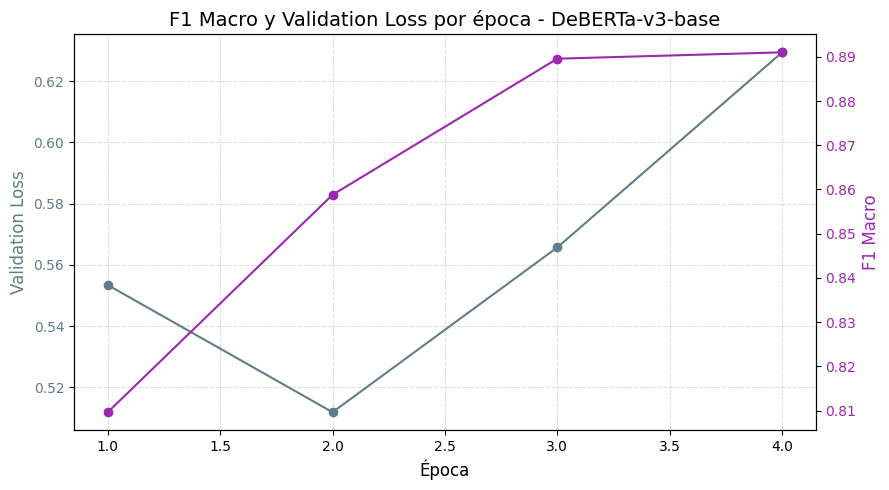

In [153]:
import matplotlib.pyplot as plt

# Extraer F1 macro desde logs
f1_macro = []
val_loss = []
epochs = []

for log in logs:
    if "eval_loss" in log and "eval_f1_macro" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1_macro.append(log["eval_f1_macro"])

# Crear figura
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1_macro, marker='o', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("F1 Macro y Validation Loss por época - DeBERTa-v3-base", fontsize=14)
fig.tight_layout()
plt.show()

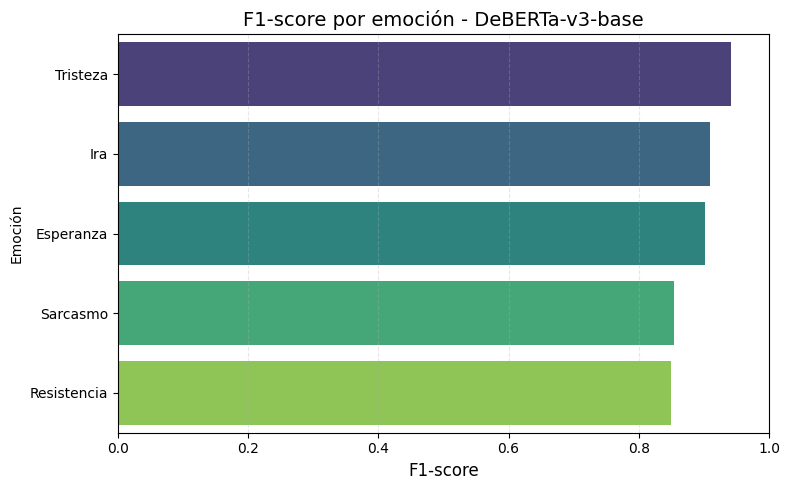

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir a DataFrame
df_f1 = pd.DataFrame(report).T
df_f1 = df_f1[df_f1.index.isin(label_encoder.classes_)]  # Solo emociones
df_f1 = df_f1.reset_index().rename(columns={"index": "Emoción", "f1-score": "F1"})

# Ordenar por F1 descendente
df_f1 = df_f1.sort_values(by="F1", ascending=False)

# 🎨 Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1, x="F1", y="Emoción", palette="viridis")

# Estilo
plt.title("F1-score por emoción - DeBERTa-v3-base", fontsize=14)
plt.xlabel("F1-score", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [155]:
# Convertir el classification report en DataFrame
df_report = pd.DataFrame(report).T

# Filtrar solo las clases (emociones)
df_clases = df_report.loc[label_encoder.classes_].copy()

# Redondear métricas
df_clases = df_clases[["precision", "recall", "f1-score", "support"]].round(3)

# Ordenar por F1 descendente
df_clases = df_clases.sort_values(by="f1-score", ascending=False)

# Mostrar tabla
print("📊 Métricas por emoción - DeBERTa-v3-base")
display(df_clases)

📊 Métricas por emoción - DeBERTa-v3-base


,precision,recall,f1-score,support
Tristeza,0.907,0.980,0.942,99.0
Ira,0.888,0.931,0.909,102.0
Esperanza,0.901,0.901,0.901,91.0
Sarcasmo,0.912,0.802,0.854,91.0
Resistencia,0.861,0.838,0.849,74.0


In [156]:
df_clases.to_csv(f"{output_dir}/metricas_por_emocion.csv")
print(f"✅ Guardado en: {output_dir}/metricas_por_emocion.csv")

✅ Guardado en: ./resultados/deberta_v3_base_optuna/metricas_por_emocion.csv


In [157]:
# ✅ Módulo 1: Imports y configuración
import os, torch
import pandas as pd
import numpy as np
import random
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from transformers import set_seed

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
set_seed(SEED)

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\u2705 Dispositivo: {device}")


✅ Dispositivo: cuda


In [158]:
# ✅ Módulo 2: Carga de datos y preparación de clases
df = pd.read_excel("Emociones_super_revisadas_test_II.xlsx")
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["emotion"])
label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
id2label = {v: k for k, v in label2id.items()}

# Pesos por clase para manejar desbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df["label"]),
    y=df["label"]
)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\n📊 Pesos de clase:")
for k, v in zip(label_encoder.classes_, class_weights):
    print(f"{k}: {v:.2f}")




📊 Pesos de clase:
Esperanza: 1.01
Ira: 0.89
Resistencia: 1.23
Sarcasmo: 1.01
Tristeza: 0.92


In [159]:
# ✅ Módulo 3: Split estratificado
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
train_dataset = Dataset.from_pandas(df_train[["text", "label"]])
val_dataset = Dataset.from_pandas(df_val[["text", "label"]])

In [160]:
# ✅ Módulo 4: Tokenización
from transformers import AutoTokenizer


nombre_modelo = "google/electra-base-discriminator"
nombre_salida = nombre_modelo.split("/")[-1].replace("-", "_")
output_dir = f"./resultados/{nombre_salida}_optuna"
os.makedirs(output_dir, exist_ok=True)

# Cargar tokenizer
tokenizer = AutoTokenizer.from_pretrained(nombre_modelo)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# Establecer formato para Trainer
tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
tokenized_val.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1826 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

In [161]:
# ------------------ 5. CONFIGURAR MODELO Y CONFIG ------------------
from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    nombre_modelo,
    num_labels=len(label2id),
    id2label={int(k): v for k, v in id2label.items()},
    label2id={k: int(v) for k, v in label2id.items()}
)

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        nombre_modelo,
        config=config
    )


In [162]:
# ------------------ 6. CUSTOM TRAINER CON PESOS ------------------
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


In [163]:
# ------------------ 7. MÉTRICAS ------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)
from transformers import EvalPrediction

def compute_metrics(eval_pred: EvalPrediction):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    report = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in sorted(id2label.keys())],
        output_dict=True
    )
    metrics = {
        "accuracy": accuracy_score(labels, preds),
        "precision_macro": precision_score(labels, preds, average="macro"),
        "recall_macro": recall_score(labels, preds, average="macro"),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision_weighted": precision_score(labels, preds, average="weighted"),
        "recall_weighted": recall_score(labels, preds, average="weighted"),
        "f1_weighted": f1_score(labels, preds, average="weighted"),
    }
    for emocion, i in label2id.items():
        if emocion in report:
            metrics[f"eval_f1_{emocion.lower()}"] = report[emocion]["f1-score"]
    return metrics


In [164]:
# ------------------ 8. EARLY STOPPING ------------------
from transformers import EarlyStoppingCallback

early_stopping = EarlyStoppingCallback(early_stopping_patience=2)


In [165]:
# ------------------ 9. FUNCIÓN DE ARGUMENTOS DE ENTRENAMIENTO ------------------
from transformers import TrainingArguments

def build_args(best_hp=None):
    return TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        logging_strategy="epoch",
        num_train_epochs=best_hp["num_train_epochs"] if best_hp else 10,
        per_device_train_batch_size=best_hp["per_device_train_batch_size"] if best_hp else 8,
        per_device_eval_batch_size=8,
        learning_rate=best_hp["learning_rate"] if best_hp else 2e-5,
        weight_decay=best_hp["weight_decay"] if best_hp else 0.1,
        fp16=torch.cuda.is_available(),
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_macro",  # 🔥 CAMBIO IMPORTANTE
        greater_is_better=True,
        report_to="none",
        logging_dir=f"{output_dir}/logs",
        seed=SEED
    )


In [166]:
# ------------------ 10. ESPACIO DE BÚSQUEDA OPTUNA ------------------
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }

In [167]:
args_temp = build_args()

trainer_temp = WeightedLossTrainer(
    model_init=model_init,
    args=args_temp,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

best_run = trainer_temp.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,  # ← Esta debe estar definida antes
    n_trials=5,
    compute_objective=lambda metrics: metrics["eval_f1_macro"],
    backend="optuna")


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-06-09 21:37:21,932] A new study created in memory with name: no-name-23cfb7ef-d175-464c-ae38-0a260c6ffff0
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.311200,0.921807,0.793814,0.783019,0.693333,0.643902,0.562092,0.702407,0.712314,0.704440,0.695232,0.715847,0.702407,0.695085
2,0.735500,0.743643,0.850829,0.776119,0.687500,0.727273,0.718894,0.754923,0.765520,0.748117,0.752123,0.762395,0.754923,0.754523
3,0.408800,0.784141,0.824121,0.760976,0.766234,0.657895,0.735294,0.752735,0.757600,0.754026,0.748904,0.757582,0.752735,0.748311
4,0.225300,0.886567,0.871508,0.780702,0.786667,0.648649,0.765550,0.774617,0.787681,0.772509,0.770615,0.785089,0.774617,0.770172
5,0.135600,0.932013,0.846561,0.800000,0.762590,0.725146,0.760976,0.781182,0.784068,0.777613,0.779055,0.781907,0.781182,0.779855
6,0.082900,0.959955,0.846561,0.798030,0.780822,0.714286,0.759615,0.781182,0.782793,0.780166,0.779863,0.781909,0.781182,0.779910


[I 2025-06-09 21:39:56,218] Trial 0 finished with value: 0.7798626839840822 and parameters: {'learning_rate': 2.0690887559282235e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 6, 'weight_decay': 0.054570843028739616}. Best is trial 0 with value: 0.7798626839840822.
Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['electra.embeddings_project.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassif

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.141500,0.832826,0.769231,0.744681,0.695035,0.631579,0.673575,0.706783,0.713126,0.706495,0.702820,0.714497,0.706783,0.703605
2,0.611600,1.059424,0.761905,0.764398,0.719424,0.752941,0.728889,0.746171,0.757014,0.742830,0.745511,0.756222,0.746171,0.746645
3,0.414500,1.224721,0.844444,0.742857,0.751678,0.774869,0.712329,0.763676,0.776202,0.766048,0.765235,0.777841,0.763676,0.764275
4,0.267600,1.440030,0.832432,0.826291,0.738255,0.707483,0.736364,0.772429,0.788654,0.768351,0.768165,0.788724,0.772429,0.770120
5,0.120400,1.438913,0.827586,0.815920,0.723684,0.741176,0.746544,0.772429,0.776958,0.769773,0.770982,0.779281,0.772429,0.773396
6,0.066100,1.764199,0.827957,0.768519,0.713287,0.693878,0.729730,0.750547,0.769396,0.745538,0.746674,0.767586,0.750547,0.748145
7,0.021200,1.711736,0.814433,0.796117,0.732394,0.758242,0.736842,0.770241,0.769526,0.768014,0.767606,0.770156,0.770241,0.769063


[I 2025-06-09 21:44:22,462] Trial 1 finished with value: 0.767605544849438 and parameters: {'learning_rate': 3.4919924485081115e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 9, 'weight_decay': 0.07132390140916497}. Best is trial 0 with value: 0.7798626839840822.
Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['electra.embeddings_project.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassific

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.251300,0.844677,0.748815,0.770950,0.652174,0.687831,0.649746,0.704595,0.714778,0.702692,0.701903,0.718495,0.704595,0.704502
2,0.646200,0.742688,0.842697,0.789744,0.720588,0.757282,0.713568,0.765864,0.773722,0.763111,0.764776,0.773294,0.765864,0.766124
3,0.356100,0.850390,0.812834,0.783920,0.761905,0.726257,0.693069,0.754923,0.756232,0.755597,0.755597,0.755639,0.754923,0.754949
4,0.189900,1.027047,0.841530,0.811881,0.765957,0.745562,0.767123,0.787746,0.794124,0.784120,0.786411,0.792658,0.787746,0.787447
5,0.110700,1.171319,0.846561,0.800000,0.782609,0.736264,0.741463,0.781182,0.785930,0.779421,0.781379,0.783303,0.781182,0.781083
6,0.074500,1.225134,0.845361,0.791878,0.782609,0.732240,0.742574,0.778993,0.783467,0.777875,0.778932,0.781161,0.778993,0.778471


[I 2025-06-09 21:46:56,226] Trial 2 finished with value: 0.7789324775134975 and parameters: {'learning_rate': 2.7561027255311116e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 7, 'weight_decay': 0.021497775956624176}. Best is trial 0 with value: 0.7798626839840822.
Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['electra.embeddings_project.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassif

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.124300,0.793050,0.819149,0.791667,0.719424,0.658436,0.605263,0.719912,0.760346,0.722139,0.718788,0.763923,0.719912,0.718531
2,0.635100,1.268679,0.727273,0.781116,0.618182,0.638037,0.715517,0.708972,0.747665,0.692945,0.696025,0.736905,0.708972,0.701310
3,0.424200,1.218414,0.831579,0.788177,0.737705,0.707182,0.761468,0.768053,0.787230,0.760447,0.765222,0.780185,0.768053,0.766733
4,0.220800,1.563519,0.804598,0.750000,0.737589,0.747664,0.717703,0.750547,0.768722,0.751138,0.751511,0.769890,0.750547,0.751400
5,0.111900,1.438068,0.804598,0.807512,0.763889,0.777202,0.747368,0.781182,0.783875,0.779392,0.780114,0.783524,0.781182,0.780804
6,0.042400,1.689705,0.822917,0.797872,0.743243,0.739394,0.723982,0.765864,0.775515,0.765016,0.765482,0.776944,0.765864,0.766362
7,0.017200,1.637550,0.832432,0.778325,0.753425,0.708075,0.739726,0.763676,0.770900,0.761692,0.762397,0.769754,0.763676,0.762717


[I 2025-06-09 21:51:20,889] Trial 3 finished with value: 0.762396554935628 and parameters: {'learning_rate': 4.332919384293757e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 7, 'weight_decay': 0.06030147576653176}. Best is trial 0 with value: 0.7798626839840822.
Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['electra.embeddings_project.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassifica

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.396700,1.053279,0.764398,0.752212,0.612903,0.599034,0.542169,0.663020,0.676322,0.656982,0.654143,0.673348,0.663020,0.656078
2,0.881400,0.819504,0.834286,0.778947,0.693548,0.708738,0.703196,0.743982,0.769281,0.737749,0.743743,0.765397,0.743982,0.745748
3,0.548600,0.897189,0.739130,0.739130,0.666667,0.658228,0.644444,0.693654,0.709317,0.697550,0.689520,0.715881,0.693654,0.690775
4,0.362700,0.686811,0.852459,0.808889,0.786667,0.675325,0.762376,0.781182,0.787390,0.779161,0.777143,0.785960,0.781182,0.777294
5,0.234100,0.689178,0.857143,0.805970,0.802817,0.742857,0.763285,0.794311,0.797648,0.793353,0.794414,0.795474,0.794311,0.793835
6,0.147500,0.783357,0.857143,0.783505,0.759124,0.734463,0.746544,0.776805,0.784054,0.774076,0.776156,0.781819,0.776805,0.776448
7,0.119000,0.800497,0.846561,0.786070,0.785714,0.720930,0.726415,0.772429,0.778898,0.771194,0.773138,0.775625,0.772429,0.772164


[I 2025-06-09 21:53:44,281] Trial 4 finished with value: 0.7731380221828377 and parameters: {'learning_rate': 2.1074614832652992e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 7, 'weight_decay': 0.07859608385696815}. Best is trial 0 with value: 0.7798626839840822.


In [168]:
# ------------------ 13. REENTRENAR CON LOS MEJORES HP ------------------
args = build_args(best_run.hyperparameters)

trainer = WeightedLossTrainer(
    model_init=model_init,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

trainer.train()


Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['electra.embeddings_project.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings_project.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at goo

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.311200,0.921807,0.793814,0.783019,0.693333,0.643902,0.562092,0.702407,0.712314,0.704440,0.695232,0.715847,0.702407,0.695085
2,0.735500,0.743643,0.850829,0.776119,0.687500,0.727273,0.718894,0.754923,0.765520,0.748117,0.752123,0.762395,0.754923,0.754523
3,0.408800,0.784141,0.824121,0.760976,0.766234,0.657895,0.735294,0.752735,0.757600,0.754026,0.748904,0.757582,0.752735,0.748311
4,0.225300,0.886567,0.871508,0.780702,0.786667,0.648649,0.765550,0.774617,0.787681,0.772509,0.770615,0.785089,0.774617,0.770172
5,0.135600,0.932013,0.846561,0.800000,0.762590,0.725146,0.760976,0.781182,0.784068,0.777613,0.779055,0.781907,0.781182,0.779855
6,0.082900,0.959955,0.846561,0.798030,0.780822,0.714286,0.759615,0.781182,0.782793,0.780166,0.779863,0.781909,0.781182,0.779910


TrainOutput(global_step=1374, training_loss=0.4832125640158396, metrics={'train_runtime': 151.3692, 'train_samples_per_second': 72.379, 'train_steps_per_second': 9.077, 'total_flos': 1441361184417792.0, 'train_loss': 0.4832125640158396, 'epoch': 6.0})

In [169]:
# ------------------ 14. GUARDAR MEJORES HP ------------------
with open(f"{output_dir}/optuna_mejor_config.txt", "w") as f:
    f.write("🧪 Mejores hiperparámetros encontrados por Optuna:\n\n")
    for key, value in best_run.hyperparameters.items():
        f.write(f"{key}: {value}\n")


In [170]:
# ------------------ 15. GUARDAR MODELO Y TOKENIZER ------------------
trainer.model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"✅ Modelo entrenado y guardado en: {output_dir}")


✅ Modelo entrenado y guardado en: ./resultados/electra_base_discriminator_optuna


In [171]:
from sklearn.model_selection import train_test_split

# Asegúrate de hacerlo una sola vez si no lo tenías antes
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
test_dataset = Dataset.from_pandas(df_test[["text", "label"]])

# Tokenizar test
tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
predictions = trainer.predict(tokenized_test)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

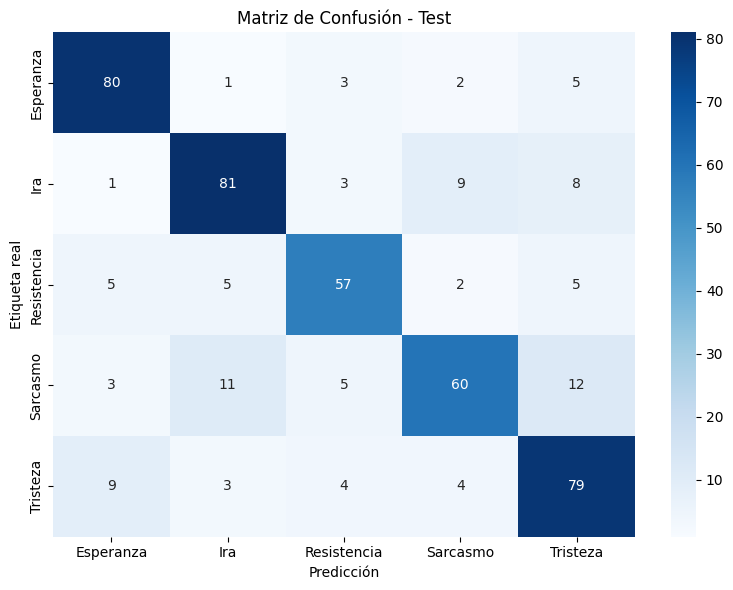

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Test")
plt.tight_layout()
plt.show()


In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

   Esperanza       0.82      0.88      0.85        91
         Ira       0.80      0.79      0.80       102
 Resistencia       0.79      0.77      0.78        74
    Sarcasmo       0.78      0.66      0.71        91
    Tristeza       0.72      0.80      0.76        99

    accuracy                           0.78       457
   macro avg       0.78      0.78      0.78       457
weighted avg       0.78      0.78      0.78       457



In [174]:
# Reconstruir DataFrame con resultados
df_resultados = pd.DataFrame({
    "text": df_test["text"].tolist(),
    "label_real": label_encoder.inverse_transform(y_true),
    "label_predicha": label_encoder.inverse_transform(y_pred),
})

df_resultados["acierto"] = df_resultados["label_real"] == df_resultados["label_predicha"]

df_resultados.to_csv(f"{output_dir}/predicciones_test_electra_base_discriminator.csv", index=False)
print(f"✅ CSV guardado en: {output_dir}/predicciones_test_electra_base_discriminator.csv")


✅ CSV guardado en: ./resultados/electra_base_discriminator_optuna/predicciones_test_electra_base_discriminator.csv


In [175]:
# Agrupamos por emoción real
resumen = df_resultados.groupby("label_real").agg(
    total=("acierto", "count"),
    aciertos=("acierto", "sum")
).reset_index()

# Calcular errores y precisión
resumen["errores"] = resumen["total"] - resumen["aciertos"]
resumen["precision_%"] = (resumen["aciertos"] / resumen["total"] * 100).round(2)

# Ordenar por precisión descendente
resumen = resumen.sort_values(by="precision_%", ascending=False)

# Mostrar tabla
print("\n📊 Desempeño por emoción:")
display(resumen)



📊 Desempeño por emoción:


,label_real,total,aciertos,errores,precision_%
0,Esperanza,91,80,11,87.91
4,Tristeza,99,79,20,79.80
1,Ira,102,81,21,79.41
2,Resistencia,74,57,17,77.03
3,Sarcasmo,91,60,31,65.93


In [176]:
resumen.to_csv(f"{output_dir}/resumen_precision_por_emocion.csv", index=False)
print(f"✅ Guardado: {output_dir}/resumen_precision_por_emocion.csv")


✅ Guardado: ./resultados/electra_base_discriminator_optuna/resumen_precision_por_emocion.csv


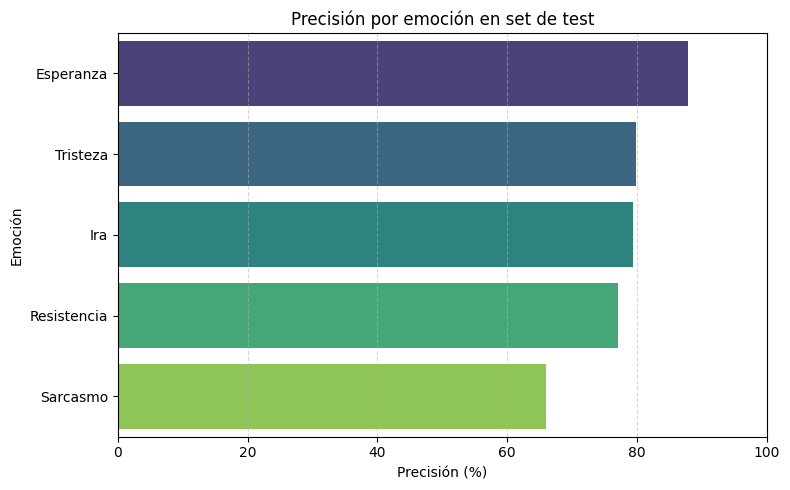

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de precisión
plt.figure(figsize=(8, 5))
sns.barplot(data=resumen, x="precision_%", y="label_real", palette="viridis")
plt.xlabel("Precisión (%)")
plt.ylabel("Emoción")
plt.title("Precisión por emoción en set de test")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [178]:
# Filtrar errores
errores = df_resultados[df_resultados["acierto"] == False]

# Tomar 3 errores por emoción real
ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)

# Mostrar
pd.set_option('display.max_colwidth', None)
display(ejemplos_por_clase[["label_real", "label_predicha", "text"]])


/tmp/ipykernel_38/4171709470.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)


,label_real,label_predicha,text
0,Esperanza,Sarcasmo,Can you be a non-Jew and be a Zionist at the same time? Because then I'm that mess. I do hope your government reins in the West Bank settlements though. Am Yisrael chai
1,Esperanza,Tristeza,I can't believe this is actual real life in 2024. Thank you for your brave reporting and honest account of this absolute travesty. It is honestly heart breaking but we must bare witness of Israel's crimes against humanity. I only hope that one day there will be justice to the suffering of all Palestinians🙏
2,Esperanza,Ira,Never again is for all of mankind!
3,Ira,Tristeza,Stop being a bully and all the horror you find will go away.
4,Ira,Resistencia,Arab countries don’t want Palestinians living amongst them. Israel can learn from the Arabs.
5,Ira,Sarcasmo,Israel is terr-orist state
6,Resistencia,Sarcasmo,"Press on, Netanyahu. Press on! 💪🏼🇮🇱💙🙌🏾"
7,Resistencia,Ira,Every one asking Isreal to stop fire on Gaza \nBut yet Russia has be firing on Ukraine for over a year now and nothing has been done to stop them \nBut yet You all want to force Israel to stop this war that she did not started
8,Resistencia,Tristeza,Palestinian lives matter
9,Sarcasmo,Ira,He lies much more than he breathes


In [179]:
ejemplos_por_clase.to_csv(f"{output_dir}/errores_por_emocion.csv", index=False)
print(f"⚠️ Errores guardados en: {output_dir}/errores_por_emocion.csv")


⚠️ Errores guardados en: ./resultados/electra_base_discriminator_optuna/errores_por_emocion.csv


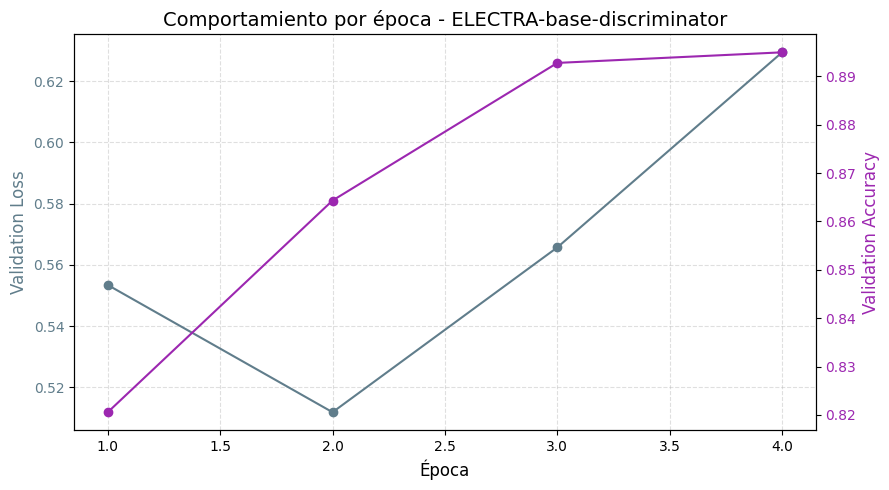

In [180]:
import json
import matplotlib.pyplot as plt

# Ruta absoluta del archivo (según tu estructura)
#trainer_state_path = "./resultados/electra_base_discriminator_optuna/checkpoint-575/trainer_state.json"

# Leer el archivo
with open(trainer_state_path, "r") as f:
    state = json.load(f)

# Extraer métricas por época
logs = state["log_history"]

epochs = []
val_loss = []
val_accuracy = []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        val_accuracy.append(log.get("eval_accuracy", None))  # Solo si se calcula

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Validation Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, val_accuracy, marker='o', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("Comportamiento por época - ELECTRA-base-discriminator", fontsize=14)
fig.tight_layout()
plt.show()

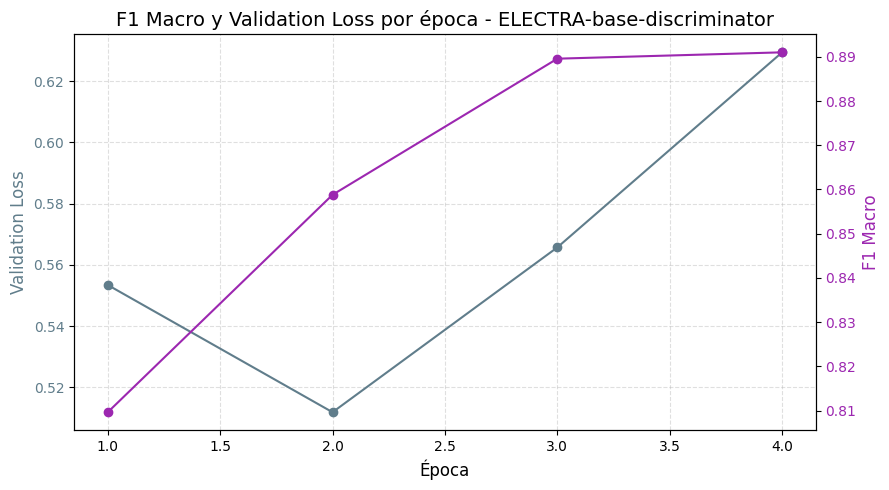

In [181]:
import matplotlib.pyplot as plt

# Extraer F1 macro desde logs
f1_macro = []
val_loss = []
epochs = []

for log in logs:
    if "eval_loss" in log and "eval_f1_macro" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1_macro.append(log["eval_f1_macro"])

# Crear figura
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1_macro, marker='o', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("F1 Macro y Validation Loss por época - ELECTRA-base-discriminator", fontsize=14)
fig.tight_layout()
plt.show()


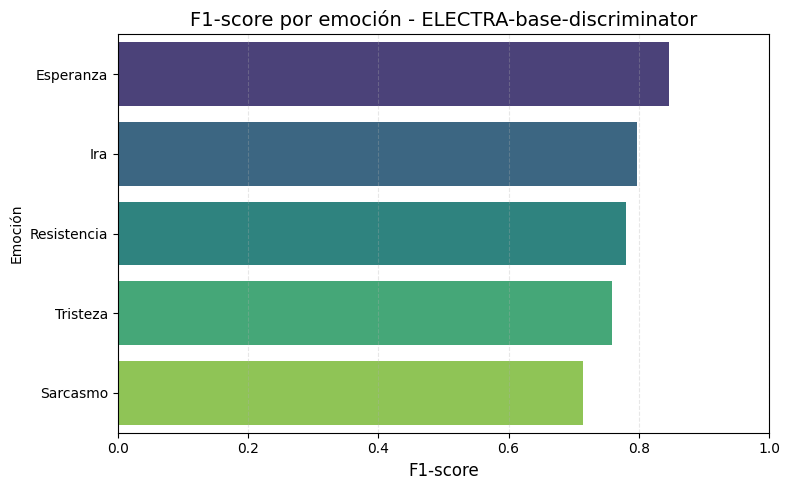

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir a DataFrame
df_f1 = pd.DataFrame(report).T
df_f1 = df_f1[df_f1.index.isin(label_encoder.classes_)]  # Solo emociones
df_f1 = df_f1.reset_index().rename(columns={"index": "Emoción", "f1-score": "F1"})

# Ordenar por F1 descendente
df_f1 = df_f1.sort_values(by="F1", ascending=False)

# 🎨 Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1, x="F1", y="Emoción", palette="viridis")

# Estilo
plt.title("F1-score por emoción - ELECTRA-base-discriminator", fontsize=14)
plt.xlabel("F1-score", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [183]:
# Convertir el classification report en DataFrame
df_report = pd.DataFrame(report).T

# Filtrar solo las clases (emociones)
df_clases = df_report.loc[label_encoder.classes_].copy()

# Redondear métricas
df_clases = df_clases[["precision", "recall", "f1-score", "support"]].round(3)

# Ordenar por F1 descendente
df_clases = df_clases.sort_values(by="f1-score", ascending=False)

# Mostrar tabla
print("📊 Métricas por emoción - ELECTRA-base-discriminator")
display(df_clases)


📊 Métricas por emoción - ELECTRA-base-discriminator


,precision,recall,f1-score,support
Esperanza,0.816,0.879,0.847,91.0
Ira,0.802,0.794,0.798,102.0
Resistencia,0.792,0.770,0.781,74.0
Tristeza,0.725,0.798,0.760,99.0
Sarcasmo,0.779,0.659,0.714,91.0


In [184]:
df_clases.to_csv(f"{output_dir}/metricas_por_emocion.csv")
print(f"✅ Guardado en: {output_dir}/metricas_por_emocion.csv")


✅ Guardado en: ./resultados/electra_base_discriminator_optuna/metricas_por_emocion.csv


In [185]:
# ✅ Módulo 1: Imports y configuración
import os, torch
import pandas as pd
import numpy as np
import random
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from transformers import set_seed

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
set_seed(SEED)

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\u2705 Dispositivo: {device}")


✅ Dispositivo: cuda


In [186]:
# ✅ Módulo 2: Carga de datos y preparación de clases
df = pd.read_excel("Emociones_super_revisadas_test_II.xlsx")
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["emotion"])
label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
id2label = {v: k for k, v in label2id.items()}

# Pesos por clase para manejar desbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df["label"]),
    y=df["label"]
)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"\n📊 Pesos de clase:")
for k, v in zip(label_encoder.classes_, class_weights):
    print(f"{k}: {v:.2f}")



📊 Pesos de clase:
Esperanza: 1.01
Ira: 0.89
Resistencia: 1.23
Sarcasmo: 1.01
Tristeza: 0.92


In [187]:
# ✅ Módulo 3: Split estratificado
df_train, df_val = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
train_dataset = Dataset.from_pandas(df_train[["text", "label"]])
val_dataset = Dataset.from_pandas(df_val[["text", "label"]])

In [188]:
# ✅ Módulo 4: Tokenización
from transformers import AutoTokenizer


nombre_modelo = "xlnet-base-cased"
nombre_salida = nombre_modelo.split("/")[-1].replace("-", "_")
output_dir = f"./resultados/{nombre_salida}_optuna"
os.makedirs(output_dir, exist_ok=True)

# Cargar tokenizer
tokenizer = AutoTokenizer.from_pretrained(nombre_modelo)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# Establecer formato para Trainer
tokenized_train.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
tokenized_val.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Map:   0%|          | 0/1826 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

In [189]:
# ------------------ 5. CONFIGURAR MODELO Y CONFIG ------------------
from transformers import AutoConfig, AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(
    nombre_modelo,
    num_labels=len(label2id),
    id2label={int(k): v for k, v in id2label.items()},
    label2id={k: int(v) for k, v in label2id.items()}
)

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        nombre_modelo,
        config=config
    )


In [190]:
# ------------------ 6. CUSTOM TRAINER CON PESOS ------------------
from transformers import Trainer

class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


In [191]:
# ------------------ 7. MÉTRICAS ------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)
from transformers import EvalPrediction

def compute_metrics(eval_pred: EvalPrediction):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    report = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in sorted(id2label.keys())],
        output_dict=True
    )
    metrics = {
        "accuracy": accuracy_score(labels, preds),
        "precision_macro": precision_score(labels, preds, average="macro"),
        "recall_macro": recall_score(labels, preds, average="macro"),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision_weighted": precision_score(labels, preds, average="weighted"),
        "recall_weighted": recall_score(labels, preds, average="weighted"),
        "f1_weighted": f1_score(labels, preds, average="weighted"),
    }
    for emocion, i in label2id.items():
        if emocion in report:
            metrics[f"eval_f1_{emocion.lower()}"] = report[emocion]["f1-score"]
    return metrics


In [192]:
# ------------------ 8. EARLY STOPPING ------------------
from transformers import EarlyStoppingCallback

early_stopping = EarlyStoppingCallback(early_stopping_patience=2)


In [193]:
# ------------------ 9. FUNCIÓN DE ARGUMENTOS DE ENTRENAMIENTO ------------------
from transformers import TrainingArguments

def build_args(best_hp=None):
    return TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,
        logging_strategy="epoch",
        num_train_epochs=best_hp["num_train_epochs"] if best_hp else 10,
        per_device_train_batch_size=best_hp["per_device_train_batch_size"] if best_hp else 8,
        per_device_eval_batch_size=8,
        learning_rate=best_hp["learning_rate"] if best_hp else 2e-5,
        weight_decay=best_hp["weight_decay"] if best_hp else 0.1,
        fp16=torch.cuda.is_available(),
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_macro",  # 🔥 CAMBIO IMPORTANTE
        greater_is_better=True,
        report_to="none",
        logging_dir=f"{output_dir}/logs",
        seed=SEED
    )


In [194]:
# ------------------ 10. ESPACIO DE BÚSQUEDA OPTUNA ------------------
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16]),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
    }

In [ ]:
args_temp = build_args()

trainer_temp = WeightedLossTrainer(
    model_init=model_init,
    args=args_temp,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

best_run = trainer_temp.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,  # ← Esta debe estar definida antes
    n_trials=5,
    compute_objective=lambda metrics: metrics["eval_f1_macro"],
    backend="optuna")



pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-06-09 21:59:48,263] A new study created in memory with name: no-name-4857c3cf-22d7-41da-9213-d834f395463e
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.298200,0.903130,0.797927,0.698795,0.619469,0.539474,0.657005,0.673961,0.709187,0.661897,0.662534,0.697967,0.673961,0.664912
2,0.772100,0.772734,0.834286,0.770732,0.700000,0.594203,0.759259,0.739606,0.760715,0.741378,0.731696,0.766007,0.739606,0.734297


[I 2025-06-09 22:03:15,246] Trial 0 finished with value: 0.7316219124312099 and parameters: {'learning_rate': 1.4724410927982802e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 8, 'weight_decay': 0.08118737430450401}. Best is trial 0 with value: 0.7316219124312099.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.311400,0.902529,0.762791,0.756522,0.526316,0.366667,0.655319,0.652079,0.683155,0.635796,0.613523,0.678537,0.652079,0.620940
2,0.768000,1.025672,0.789744,0.742574,0.691489,0.577778,0.721649,0.713348,0.736753,0.719094,0.704647,0.743270,0.713348,0.706347
3,0.465000,1.226288,0.819149,0.787879,0.711409,0.670455,0.729064,0.746171,0.743727,0.744580,0.743591,0.746198,0.746171,0.745600
4,0.302800,1.521088,0.812183,0.770053,0.732394,0.689655,0.682243,0.737418,0.744831,0.736884,0.737306,0.744626,0.737418,0.737313
5,0.158000,1.543039,0.827957,0.785047,0.748466,0.683230,0.736842,0.759300,0.760173,0.761095,0.756308,0.762868,0.759300,0.756951
6,0.085200,1.501965,0.839779,0.786730,0.741722,0.703704,0.727273,0.761488,0.765382,0.759939,0.759841,0.765402,0.761488,0.760593


[I 2025-06-09 22:09:03,992] Trial 1 finished with value: 0.7598414297251667 and parameters: {'learning_rate': 2.0855868677439184e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 6, 'weight_decay': 0.018392888653127118}. Best is trial 1 with value: 0.7598414297251667.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized fro

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.215900,0.783411,0.778846,0.747573,0.636364,0.619048,0.720000,0.708972,0.709005,0.702256,0.700366,0.709265,0.708972,0.704227
2,0.686900,0.797083,0.822857,0.788991,0.761905,0.637500,0.757009,0.757112,0.761825,0.753945,0.753652,0.760129,0.757112,0.754255
3,0.471900,1.060584,0.840426,0.786730,0.760736,0.630872,0.768473,0.763676,0.766575,0.764812,0.757447,0.768764,0.763676,0.758223
4,0.331000,1.350996,0.815217,0.780000,0.789474,0.666667,0.728889,0.757112,0.768995,0.757683,0.756049,0.767565,0.757112,0.754907
5,0.209500,1.452920,0.808989,0.786070,0.766467,0.703704,0.757282,0.765864,0.769105,0.768967,0.764502,0.772108,0.765864,0.764822
6,0.135400,1.522072,0.835165,0.798030,0.802632,0.670886,0.757991,0.774617,0.780382,0.774882,0.772941,0.779286,0.774617,0.772178
7,0.098900,1.535951,0.836158,0.800000,0.800000,0.687500,0.755760,0.776805,0.782806,0.777525,0.775884,0.782234,0.776805,0.775215


[I 2025-06-09 22:15:47,667] Trial 2 finished with value: 0.775883712150798 and parameters: {'learning_rate': 1.2559718019363043e-05, 'per_device_train_batch_size': 4, 'num_train_epochs': 7, 'weight_decay': 0.06556639650536453}. Best is trial 2 with value: 0.775883712150798.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from t

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.476600,1.097277,0.675676,0.598930,0.491228,0.486842,0.505495,0.560175,0.565021,0.562401,0.551634,0.572001,0.560175,0.554212
2,0.989100,0.864847,0.769231,0.682635,0.628205,0.647399,0.699552,0.689278,0.701519,0.689685,0.685404,0.708340,0.689278,0.687713
3,0.718800,0.748939,0.804348,0.761421,0.687898,0.666667,0.739336,0.735230,0.735089,0.734097,0.731934,0.738864,0.735230,0.734412
4,0.559500,0.761612,0.795580,0.775510,0.703297,0.686391,0.731183,0.739606,0.745260,0.745081,0.738392,0.753098,0.739606,0.740465
5,0.433200,0.725498,0.827957,0.768519,0.797468,0.654088,0.758974,0.763676,0.764827,0.766027,0.761401,0.764599,0.763676,0.760188
6,0.336700,0.806219,0.829787,0.755319,0.767123,0.650000,0.715517,0.743982,0.757033,0.743958,0.743549,0.755584,0.743982,0.742465
7,0.289000,0.746900,0.827957,0.783505,0.779221,0.714286,0.754717,0.772429,0.774760,0.773897,0.771937,0.775747,0.772429,0.771643
8,0.218800,0.788348,0.808511,0.782178,0.775000,0.678788,0.753769,0.761488,0.760238,0.764095,0.759649,0.762238,0.761488,0.759517
9,0.183400,0.815736,0.819149,0.783505,0.792208,0.690909,0.751174,0.768053,0.770885,0.770006,0.767389,0.771316,0.768053,0.766570


[I 2025-06-09 22:22:48,853] Trial 3 finished with value: 0.7673889365692916 and parameters: {'learning_rate': 1.0759678974489272e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 10, 'weight_decay': 0.01780213720945881}. Best is trial 2 with value: 0.775883712150798.
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized fro

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.208000,0.911933,0.735931,0.704981,0.504505,0.500000,0.659218,0.649891,0.696979,0.634600,0.620927,0.692615,0.649891,0.627951
2,0.685500,0.688909,0.818182,0.741117,0.772152,0.692308,0.731278,0.750547,0.764175,0.752602,0.751007,0.763665,0.750547,0.749637
3,0.403000,0.841417,0.824742,0.775701,0.743243,0.648276,0.760563,0.757112,0.768382,0.754151,0.750505,0.767647,0.757112,0.751558
4,0.224700,0.941362,0.836158,0.784314,0.797546,0.675325,0.731481,0.765864,0.775145,0.769057,0.764965,0.775283,0.765864,0.763632
5,0.113300,1.021791,0.846154,0.813725,0.819876,0.697368,0.762791,0.789934,0.798850,0.792494,0.787983,0.799095,0.789934,0.786975


[I 2025-06-09 22:27:06,638] Trial 4 finished with value: 0.7879828462948979 and parameters: {'learning_rate': 2.4808082867805866e-05, 'per_device_train_batch_size': 8, 'num_train_epochs': 5, 'weight_decay': 0.03575882405488963}. Best is trial 4 with value: 0.7879828462948979.


In [ ]:
# ------------------ 13. REENTRENAR CON LOS MEJORES HP ------------------
args = build_args(best_run.hyperparameters)

trainer = WeightedLossTrainer(
    model_init=model_init,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)

trainer.train()


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Epoch,Training Loss,Validation Loss,F1 Esperanza,F1 Ira,F1 Resistencia,F1 Sarcasmo,F1 Tristeza,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.208000,0.911933,0.735931,0.704981,0.504505,0.500000,0.659218,0.649891,0.696979,0.634600,0.620927,0.692615,0.649891,0.627951
2,0.685500,0.688909,0.818182,0.741117,0.772152,0.692308,0.731278,0.750547,0.764175,0.752602,0.751007,0.763665,0.750547,0.749637
3,0.403000,0.841417,0.824742,0.775701,0.743243,0.648276,0.760563,0.757112,0.768382,0.754151,0.750505,0.767647,0.757112,0.751558
4,0.224700,0.941362,0.836158,0.784314,0.797546,0.675325,0.731481,0.765864,0.775145,0.769057,0.764965,0.775283,0.765864,0.763632
5,0.113300,1.021791,0.846154,0.813725,0.819876,0.697368,0.762791,0.789934,0.798850,0.792494,0.787983,0.799095,0.789934,0.786975


TrainOutput(global_step=1145, training_loss=0.5269113848823648, metrics={'train_runtime': 256.3414, 'train_samples_per_second': 35.617, 'train_steps_per_second': 4.467, 'total_flos': 1300510828784640.0, 'train_loss': 0.5269113848823648, 'epoch': 5.0})

In [ ]:
# ------------------ 14. GUARDAR MEJORES HP ------------------
with open(f"{output_dir}/optuna_mejor_config.txt", "w") as f:
    f.write("🧪 Mejores hiperparámetros encontrados por Optuna:\n\n")
    for key, value in best_run.hyperparameters.items():
        f.write(f"{key}: {value}\n")

        

In [ ]:
# ------------------ 15. GUARDAR MODELO Y TOKENIZER ------------------
trainer.model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"✅ Modelo entrenado y guardado en: {output_dir}")


✅ Modelo entrenado y guardado en: ./resultados/xlnet_base_cased_optuna


In [ ]:
from sklearn.model_selection import train_test_split

# Asegúrate de hacerlo una sola vez si no lo tenías antes
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=SEED)
test_dataset = Dataset.from_pandas(df_test[["text", "label"]])

# Tokenizar test
tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
predictions = trainer.predict(tokenized_test)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

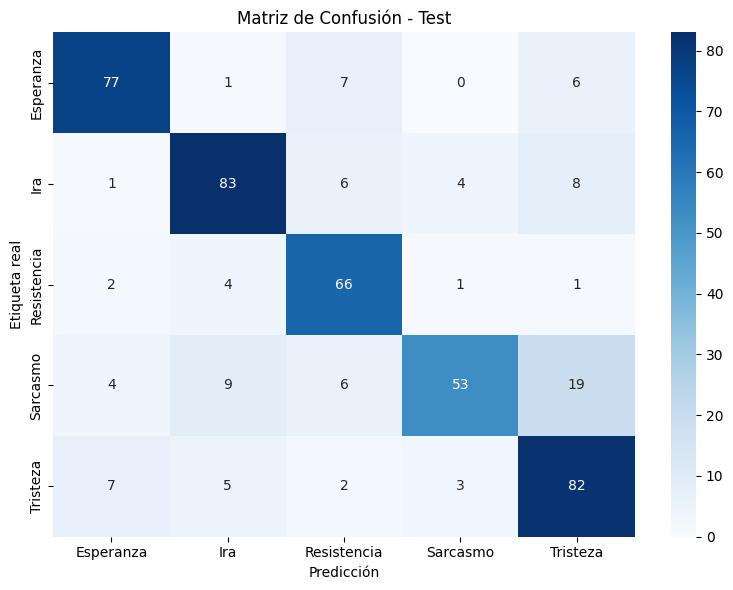

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Test")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

   Esperanza       0.85      0.85      0.85        91
         Ira       0.81      0.81      0.81       102
 Resistencia       0.76      0.89      0.82        74
    Sarcasmo       0.87      0.58      0.70        91
    Tristeza       0.71      0.83      0.76        99

    accuracy                           0.79       457
   macro avg       0.80      0.79      0.79       457
weighted avg       0.80      0.79      0.79       457



In [ ]:
# Reconstruir DataFrame con resultados
df_resultados = pd.DataFrame({
    "text": df_test["text"].tolist(),
    "label_real": label_encoder.inverse_transform(y_true),
    "label_predicha": label_encoder.inverse_transform(y_pred),
})

df_resultados["acierto"] = df_resultados["label_real"] == df_resultados["label_predicha"]

df_resultados.to_csv(f"{output_dir}/predicciones_test_xlnet-base-cased.csv", index=False)
#print(f"✅ CSV guardado en: {output_dir}/predicciones_test_xlnet-base-cased.csv")


In [ ]:
# Agrupamos por emoción real
resumen = df_resultados.groupby("label_real").agg(
    total=("acierto", "count"),
    aciertos=("acierto", "sum")
).reset_index()

# Calcular errores y precisión
resumen["errores"] = resumen["total"] - resumen["aciertos"]
resumen["precision_%"] = (resumen["aciertos"] / resumen["total"] * 100).round(2)

# Ordenar por precisión descendente
resumen = resumen.sort_values(by="precision_%", ascending=False)

# Mostrar tabla
print("\n📊 Desempeño por emoción:")
display(resumen)



📊 Desempeño por emoción:


,label_real,total,aciertos,errores,precision_%
2,Resistencia,74,66,8,89.19
0,Esperanza,91,77,14,84.62
4,Tristeza,99,82,17,82.83
1,Ira,102,83,19,81.37
3,Sarcasmo,91,53,38,58.24


In [ ]:
resumen.to_csv(f"{output_dir}/resumen_precision_por_emocion.csv", index=False)
print(f"✅ Guardado: {output_dir}/resumen_precision_por_emocion.csv")


✅ Guardado: ./resultados/xlnet_base_cased_optuna/resumen_precision_por_emocion.csv


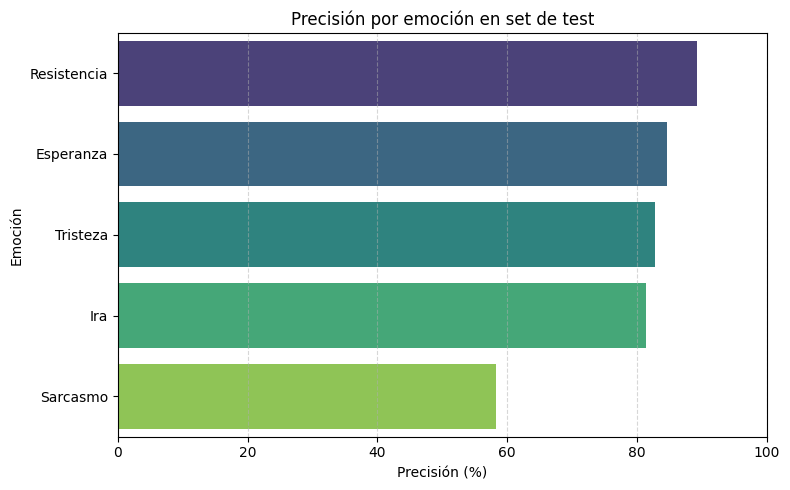

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de precisión
plt.figure(figsize=(8, 5))
sns.barplot(data=resumen, x="precision_%", y="label_real", palette="viridis")
plt.xlabel("Precisión (%)")
plt.ylabel("Emoción")
plt.title("Precisión por emoción en set de test")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrar errores
errores = df_resultados[df_resultados["acierto"] == False]

# Tomar 3 errores por emoción real
ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)

# Mostrar
pd.set_option('display.max_colwidth', None)
display(ejemplos_por_clase[["label_real", "label_predicha", "text"]])


/tmp/ipykernel_38/4171709470.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ejemplos_por_clase = errores.groupby("label_real").apply(lambda x: x.sample(n=min(3, len(x)), random_state=SEED)).reset_index(drop=True)


,label_real,label_predicha,text
0,Esperanza,Tristeza,"In every child’s innocent face, there’s a story of strength, resilience, and the silent cries of a land longing for peace.""🤲🇵🇸✨🙌🙌"
1,Esperanza,Resistencia,"That’s is what the British people are all about, thanks folks, the British people has now shown the true high integrity that will come to the fore and now we will see action,with the disregard of the pressures that was put upon them"
2,Esperanza,Tristeza,I can't believe this is actual real life in 2024. Thank you for your brave reporting and honest account of this absolute travesty. It is honestly heart breaking but we must bare witness of Israel's crimes against humanity. I only hope that one day there will be justice to the suffering of all Palestinians🙏
3,Ira,Resistencia,"Israel You can include the BBC, for giving a platform to Iran."
4,Ira,Resistencia,Better not be turned over to the Arabs hands
5,Ira,Tristeza,🤬 I can't even comprehend. It's just too fucking much.
6,Resistencia,Ira,Hamas is losing. They’re AFRAID NOW
7,Resistencia,Sarcasmo,Let you in on a little secret guys...it ain't over.
8,Resistencia,Ira,Every one asking Isreal to stop fire on Gaza \nBut yet Russia has be firing on Ukraine for over a year now and nothing has been done to stop them \nBut yet You all want to force Israel to stop this war that she did not started
9,Sarcasmo,Tristeza,😂😂😂trying to save Israel😂😂😂


In [ ]:
ejemplos_por_clase.to_csv(f"{output_dir}/errores_por_emocion.csv", index=False)
print(f"⚠️ Errores guardados en: {output_dir}/errores_por_emocion.csv")


⚠️ Errores guardados en: ./resultados/xlnet_base_cased_optuna/errores_por_emocion.csv


In [ ]:
import json
import matplotlib.pyplot as plt

# Ruta absoluta del archivo (según tu estructura)
#trainer_state_path = "./resultados/roberta_base_optuna/checkpoint-575/trainer_state.json"

# Leer el archivo
with open(trainer_state_path, "r") as f:
    state = json.load(f)

# Extraer métricas por época
logs = state["log_history"]

epochs = []
val_loss = []
val_accuracy = []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        val_accuracy.append(log.get("eval_accuracy", None))  # Solo si se calcula

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Validation Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, val_accuracy, marker='o', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("Comportamiento por época - XLNet-base-cased", fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extraer F1 macro desde logs
f1_macro = []
val_loss = []
epochs = []

for log in logs:
    if "eval_loss" in log and "eval_f1_macro" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1_macro.append(log["eval_f1_macro"])

# Crear figura
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#607d8b"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1_macro, marker='o', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

# Título y layout
plt.title("F1 Macro y Validation Loss por época - XLNet-base-cased", fontsize=14)
fig.tight_layout()
plt.show()

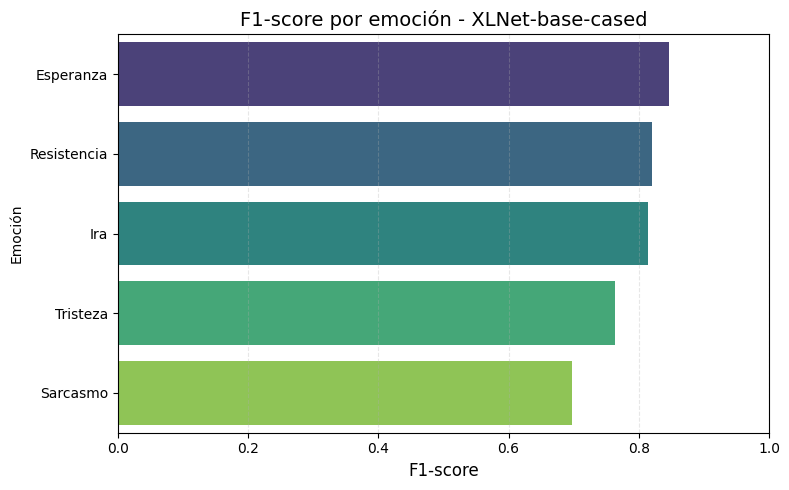

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir a DataFrame
df_f1 = pd.DataFrame(report).T
df_f1 = df_f1[df_f1.index.isin(label_encoder.classes_)]  # Solo emociones
df_f1 = df_f1.reset_index().rename(columns={"index": "Emoción", "f1-score": "F1"})

# Ordenar por F1 descendente
df_f1 = df_f1.sort_values(by="F1", ascending=False)

# 🎨 Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1, x="F1", y="Emoción", palette="viridis")

# Estilo
plt.title("F1-score por emoción - XLNet-base-cased", fontsize=14)
plt.xlabel("F1-score", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Convertir el classification report en DataFrame
df_report = pd.DataFrame(report).T

# Filtrar solo las clases (emociones)
df_clases = df_report.loc[label_encoder.classes_].copy()

# Redondear métricas
df_clases = df_clases[["precision", "recall", "f1-score", "support"]].round(3)

# Ordenar por F1 descendente
df_clases = df_clases.sort_values(by="f1-score", ascending=False)

# Mostrar tabla
print("📊 Métricas por emoción - XLNet-base-cased")
display(df_clases)


📊 Métricas por emoción - XLNet-base-cased


,precision,recall,f1-score,support
Esperanza,0.846,0.846,0.846,91.0
Resistencia,0.759,0.892,0.820,74.0
Ira,0.814,0.814,0.814,102.0
Tristeza,0.707,0.828,0.763,99.0
Sarcasmo,0.869,0.582,0.697,91.0


In [ ]:
df_clases.to_csv(f"{output_dir}/metricas_por_emocion.csv")
print(f"✅ Guardado en: {output_dir}/metricas_por_emocion.csv")


✅ Guardado en: ./resultados/xlnet_base_cased_optuna/metricas_por_emocion.csv


In [ ]:
ruta_modelo = "./resultados/roberta_base_optuna"
with open(f"{ruta_modelo}/optuna_mejor_config.txt", "r") as f:
    mejores_hp = f.read()
print(mejores_hp)


🧪 Mejores hiperparámetros encontrados por Optuna:

learning_rate: 1.448130806611366e-05
per_device_train_batch_size: 16
num_train_epochs: 5
weight_decay: 0.035917651206719296



In [ ]:
ruta_modelo = "./resultados/electra_base_discriminator_optuna"
with open(f"{ruta_modelo}/optuna_mejor_config.txt", "r") as f:
    mejores_hp = f.read()
print(mejores_hp)


🧪 Mejores hiperparámetros encontrados por Optuna:

learning_rate: 2.0690887559282235e-05
per_device_train_batch_size: 8
num_train_epochs: 6
weight_decay: 0.054570843028739616



In [ ]:
ruta_modelo = "./resultados/deberta_v3_base_optuna"
with open(f"{ruta_modelo}/optuna_mejor_config.txt", "r") as f:
    mejores_hp = f.read()
print(mejores_hp)


🧪 Mejores hiperparámetros encontrados por Optuna:

learning_rate: 1.1490977529237664e-05
per_device_train_batch_size: 8
num_train_epochs: 6
weight_decay: 0.06309090934349716



In [ ]:
ruta_modelo = "./resultados/xlnet_base_cased_optuna"
with open(f"{ruta_modelo}/optuna_mejor_config.txt", "r") as f:
    mejores_hp = f.read()
print(mejores_hp)


🧪 Mejores hiperparámetros encontrados por Optuna:

learning_rate: 2.4808082867805866e-05
per_device_train_batch_size: 8
num_train_epochs: 5
weight_decay: 0.03575882405488963



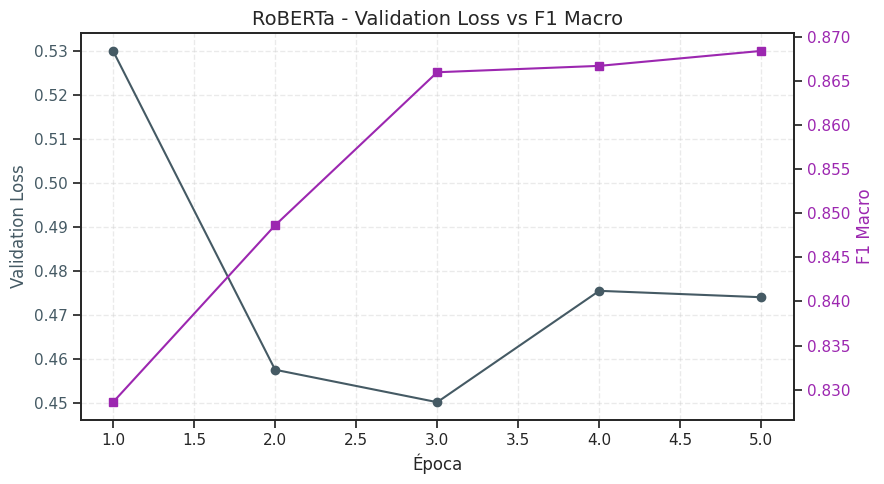

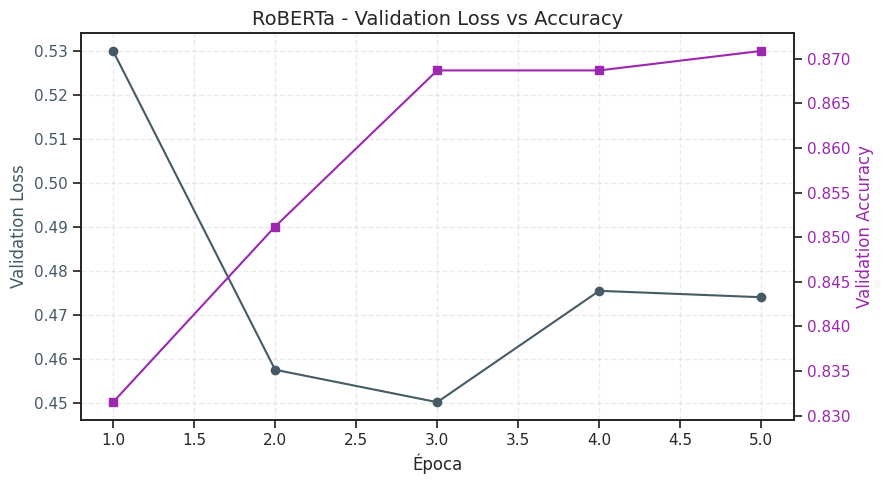

In [ ]:
import json
import matplotlib.pyplot as plt

ruta_state = "./resultados/roberta_base_optuna/checkpoint-575/trainer_state.json"
with open(ruta_state, "r") as f:
    trainer_state = json.load(f)

logs = trainer_state["log_history"]
epochs, val_loss, f1, acc = [], [], [], []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1.append(log.get("eval_f1_macro", None))
        acc.append(log.get("eval_accuracy", None))

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1, marker='s', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("RoBERTa - Validation Loss vs F1 Macro", fontsize=14)
plt.tight_layout()
plt.show()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, acc, marker='s', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("RoBERTa - Validation Loss vs Accuracy", fontsize=14)
plt.tight_layout()
plt.show()



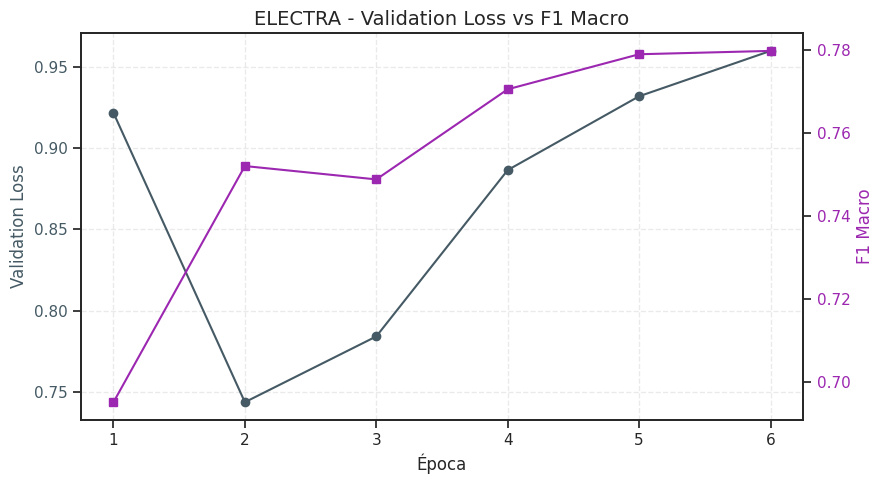

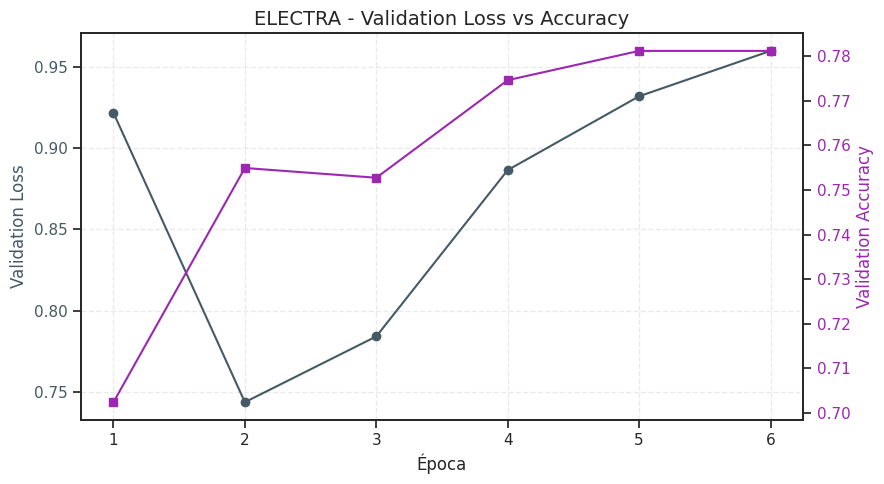

In [ ]:
import json
import matplotlib.pyplot as plt

ruta_state = "./resultados/electra_base_discriminator_optuna/checkpoint-1374/trainer_state.json"
with open(ruta_state, "r") as f:
    trainer_state = json.load(f)

logs = trainer_state["log_history"]
epochs, val_loss, f1, acc = [], [], [], []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1.append(log.get("eval_f1_macro", None))
        acc.append(log.get("eval_accuracy", None))

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1, marker='s', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("ELECTRA - Validation Loss vs F1 Macro", fontsize=14)
plt.tight_layout()
plt.show()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, acc, marker='s', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("ELECTRA - Validation Loss vs Accuracy", fontsize=14)
plt.tight_layout()
plt.show()


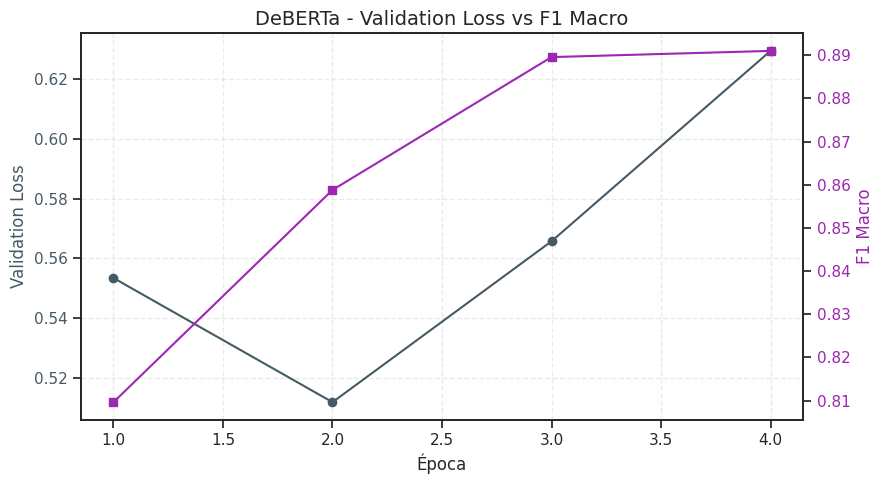

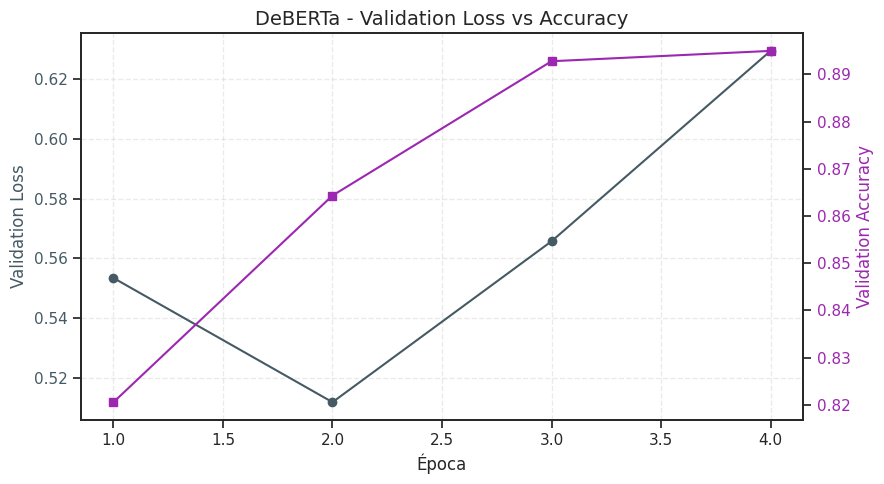

In [ ]:
import json
import matplotlib.pyplot as plt

ruta_state = "./resultados/deberta_v3_base_optuna/checkpoint-916/trainer_state.json"
with open(ruta_state, "r") as f:
    trainer_state = json.load(f)

logs = trainer_state["log_history"]
epochs, val_loss, f1, acc = [], [], [], []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1.append(log.get("eval_f1_macro", None))
        acc.append(log.get("eval_accuracy", None))

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1, marker='s', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("DeBERTa - Validation Loss vs F1 Macro", fontsize=14)
plt.tight_layout()
plt.show()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, acc, marker='s', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("DeBERTa - Validation Loss vs Accuracy", fontsize=14)
plt.tight_layout()
plt.show()



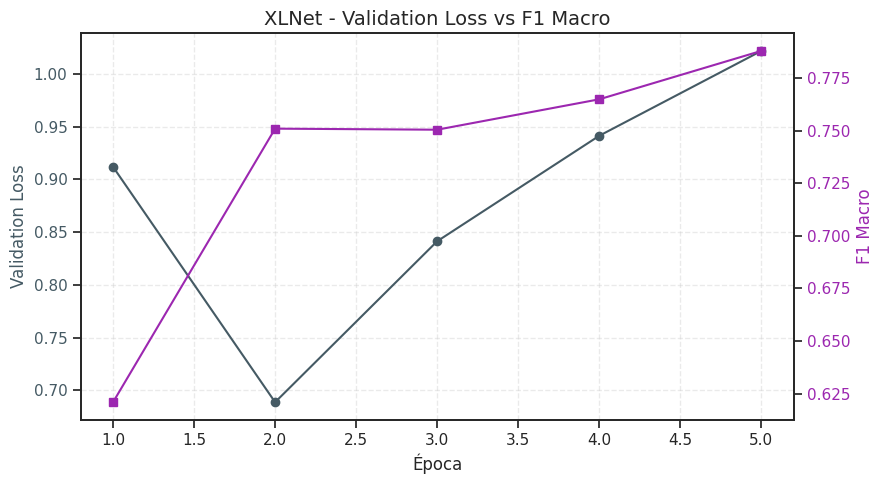

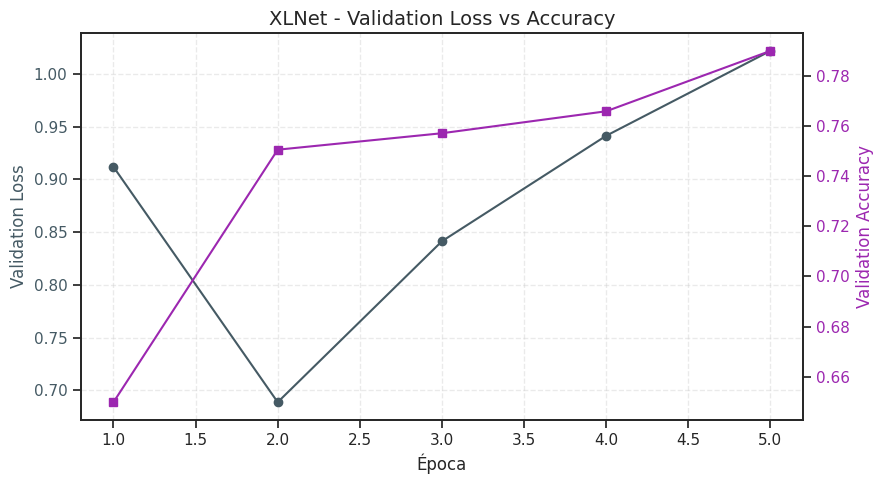

In [ ]:
import json
import matplotlib.pyplot as plt

ruta_state = "./resultados/xlnet_base_cased_optuna/checkpoint-1145/trainer_state.json"
with open(ruta_state, "r") as f:
    trainer_state = json.load(f)

logs = trainer_state["log_history"]
epochs, val_loss, f1, acc = [], [], [], []

for log in logs:
    if "eval_loss" in log:
        epochs.append(log["epoch"])
        val_loss.append(log["eval_loss"])
        f1.append(log.get("eval_f1_macro", None))
        acc.append(log.get("eval_accuracy", None))

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: F1 Macro
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("F1 Macro", color=color2, fontsize=12)
ax2.plot(epochs, f1, marker='s', color=color2, label="F1 Macro")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("XLNet - Validation Loss vs F1 Macro", fontsize=14)
plt.tight_layout()
plt.show()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primer eje Y: Validation Loss
color1 = "#455a64"
ax1.set_xlabel("Época", fontsize=12)
ax1.set_ylabel("Validation Loss", color=color1, fontsize=12)
ax1.plot(epochs, val_loss, marker='o', color=color1, label="Validation Loss")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)

# Segundo eje Y: Accuracy
ax2 = ax1.twinx()
color2 = "#9c27b0"
ax2.set_ylabel("Validation Accuracy", color=color2, fontsize=12)
ax2.plot(epochs, acc, marker='s', color=color2, label="Validation Accuracy")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("XLNet - Validation Loss vs Accuracy", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def predecir_y_guardar_resultados(nombre_modelo, archivo_test="Emociones_super_revisadas_test_II.xlsx", output_base="./resultados", seed=42, max_length=256):
    # 1. Configuración inicial
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    ruta_modelo = os.path.join(output_base, nombre_modelo)
    output_dir = ruta_modelo

    # 2. Cargar modelo y tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(ruta_modelo).to(device)
    tokenizer = AutoTokenizer.from_pretrained(ruta_modelo)

    # 3. Cargar y preparar datos
    df = pd.read_excel(archivo_test)
    label_encoder = LabelEncoder()
    df["label"] = label_encoder.fit_transform(df["emotion"])
    df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=seed)

    test_dataset = Dataset.from_pandas(df_test[["text", "label"]])
    tokenize_function = lambda e: tokenizer(e["text"], padding="max_length", truncation=True, max_length=max_length)
    tokenized_test = test_dataset.map(tokenize_function, batched=True)
    tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

    # 4. Predicción
    trainer = Trainer(model=model)
    predictions = trainer.predict(tokenized_test)
    y_true = predictions.label_ids
    y_pred = np.argmax(predictions.predictions, axis=1)

    # 5. Reporte de clasificación
    print(f"\n📊 Reporte para: {nombre_modelo}\n")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # 6. Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    labels = label_encoder.classes_

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/matriz_confusion_{nombre_modelo}.png")
    plt.show()

    # 7. Guardar predicciones
    df_test = df_test.reset_index(drop=True)
    df_test["label_predicha"] = y_pred
    df_test["emocion_predicha"] = df_test["label_predicha"].map(dict(enumerate(label_encoder.classes_)))
    df_test.to_csv(f"{output_dir}/predicciones_test_{nombre_modelo}.csv", index=False)


Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: deberta_v3_base_optuna

              precision    recall  f1-score   support

   Esperanza       0.90      0.90      0.90        91
         Ira       0.89      0.93      0.91       102
 Resistencia       0.86      0.84      0.85        74
    Sarcasmo       0.91      0.80      0.85        91
    Tristeza       0.91      0.98      0.94        99

    accuracy                           0.89       457
   macro avg       0.89      0.89      0.89       457
weighted avg       0.90      0.89      0.89       457



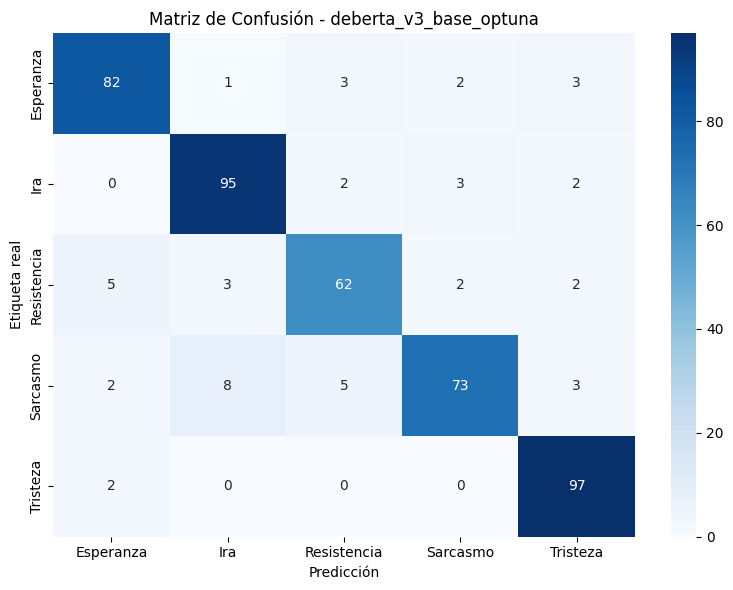

Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: roberta_base_optuna

              precision    recall  f1-score   support

   Esperanza       0.86      0.88      0.87        91
         Ira       0.85      0.86      0.86       102
 Resistencia       0.85      0.84      0.84        74
    Sarcasmo       0.88      0.80      0.84        91
    Tristeza       0.90      0.96      0.93        99

    accuracy                           0.87       457
   macro avg       0.87      0.87      0.87       457
weighted avg       0.87      0.87      0.87       457



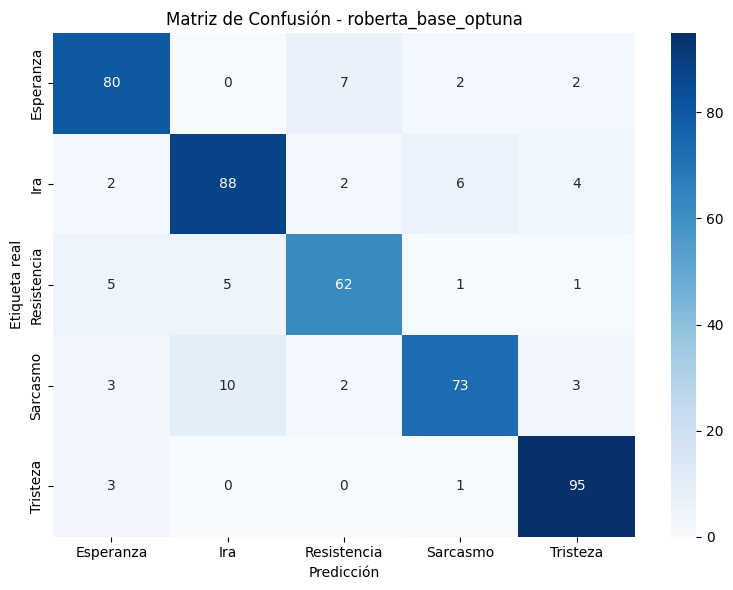

Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: electra_base_discriminator_optuna

              precision    recall  f1-score   support

   Esperanza       0.82      0.88      0.85        91
         Ira       0.80      0.79      0.80       102
 Resistencia       0.79      0.77      0.78        74
    Sarcasmo       0.78      0.66      0.71        91
    Tristeza       0.72      0.80      0.76        99

    accuracy                           0.78       457
   macro avg       0.78      0.78      0.78       457
weighted avg       0.78      0.78      0.78       457



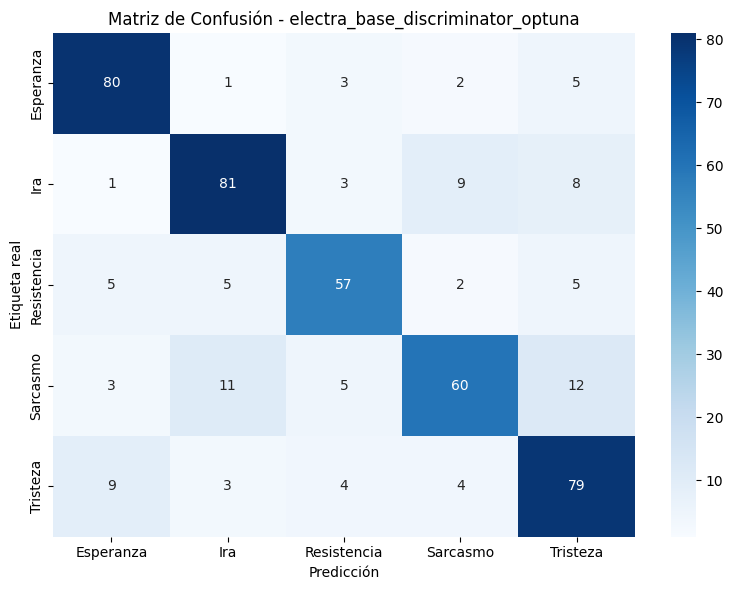

Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: xlnet_base_cased_optuna

              precision    recall  f1-score   support

   Esperanza       0.85      0.85      0.85        91
         Ira       0.81      0.81      0.81       102
 Resistencia       0.76      0.89      0.82        74
    Sarcasmo       0.87      0.58      0.70        91
    Tristeza       0.71      0.83      0.76        99

    accuracy                           0.79       457
   macro avg       0.80      0.79      0.79       457
weighted avg       0.80      0.79      0.79       457



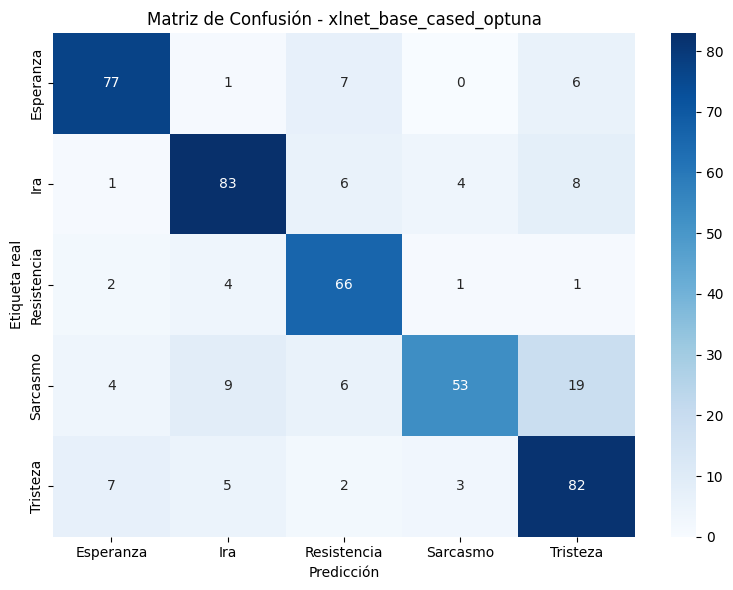

In [ ]:
predecir_y_guardar_resultados("deberta_v3_base_optuna")
predecir_y_guardar_resultados("roberta_base_optuna")
predecir_y_guardar_resultados("electra_base_discriminator_optuna")
predecir_y_guardar_resultados("xlnet_base_cased_optuna")

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

def predecir_y_guardar_resultados(nombre_modelo, archivo_test="Emociones_super_revisadas_test_II.xlsx", output_base="./resultados", seed=42, max_length=256):
    # 1. Configuración inicial
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    ruta_modelo = os.path.join(output_base, nombre_modelo)
    output_dir = ruta_modelo

    # 2. Cargar modelo y tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(ruta_modelo).to(device)
    tokenizer = AutoTokenizer.from_pretrained(ruta_modelo)

    # 3. Cargar y preparar datos
    df = pd.read_excel(archivo_test)
    label_encoder = LabelEncoder()
    df["label"] = label_encoder.fit_transform(df["emotion"])
    df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=seed)

    test_dataset = Dataset.from_pandas(df_test[["text", "label"]])
    tokenize_function = lambda e: tokenizer(e["text"], padding="max_length", truncation=True, max_length=max_length)
    tokenized_test = test_dataset.map(tokenize_function, batched=True)
    tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

    # 4. Predicción
    trainer = Trainer(model=model)
    predictions = trainer.predict(tokenized_test)
    y_true = predictions.label_ids
    y_pred = np.argmax(predictions.predictions, axis=1)

    # 5. Reporte de clasificación
    print(f"\n📊 Reporte para: {nombre_modelo}\n")
    report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    print(report)

    # 6. Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    labels = label_encoder.classes_

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/matriz_confusion_{nombre_modelo}.png")
    plt.close()

    # 7. Guardar predicciones
    df_test = df_test.reset_index(drop=True)
    df_test["label_predicha"] = y_pred
    df_test["emocion_predicha"] = df_test["label_predicha"].map(dict(enumerate(label_encoder.classes_)))
    df_test.to_csv(f"{output_dir}/predicciones_test_{nombre_modelo}.csv", index=False)

    # 8. Métricas resumen para comparación
    resumen = {
        "modelo": nombre_modelo,
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_macro": f1_score(y_true, y_pred, average="macro"),
        "precision_macro": precision_score(y_true, y_pred, average="macro"),
        "recall_macro": recall_score(y_true, y_pred, average="macro"),
        "reporte_completo": report
    }

    return resumen


In [ ]:
modelos = ["deberta_v3_base_optuna", "roberta_base_optuna", "electra_base_discriminator_optuna", "xlnet_base_cased_optuna"]
resultados = []

for modelo in modelos:
    resultado = predecir_y_guardar_resultados(modelo)
    resultados.append(resultado)

# Convertir a DataFrame para comparación
df_resultados = pd.DataFrame(resultados)
display(df_resultados[["modelo", "accuracy", "f1_macro", "precision_macro", "recall_macro"]])


Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: deberta_v3_base_optuna

              precision    recall  f1-score   support

   Esperanza       0.90      0.90      0.90        91
         Ira       0.89      0.93      0.91       102
 Resistencia       0.86      0.84      0.85        74
    Sarcasmo       0.91      0.80      0.85        91
    Tristeza       0.91      0.98      0.94        99

    accuracy                           0.89       457
   macro avg       0.89      0.89      0.89       457
weighted avg       0.90      0.89      0.89       457



Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: roberta_base_optuna

              precision    recall  f1-score   support

   Esperanza       0.86      0.88      0.87        91
         Ira       0.85      0.86      0.86       102
 Resistencia       0.85      0.84      0.84        74
    Sarcasmo       0.88      0.80      0.84        91
    Tristeza       0.90      0.96      0.93        99

    accuracy                           0.87       457
   macro avg       0.87      0.87      0.87       457
weighted avg       0.87      0.87      0.87       457



Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: electra_base_discriminator_optuna

              precision    recall  f1-score   support

   Esperanza       0.82      0.88      0.85        91
         Ira       0.80      0.79      0.80       102
 Resistencia       0.79      0.77      0.78        74
    Sarcasmo       0.78      0.66      0.71        91
    Tristeza       0.72      0.80      0.76        99

    accuracy                           0.78       457
   macro avg       0.78      0.78      0.78       457
weighted avg       0.78      0.78      0.78       457



Map:   0%|          | 0/457 [00:00<?, ? examples/s]


📊 Reporte para: xlnet_base_cased_optuna

              precision    recall  f1-score   support

   Esperanza       0.85      0.85      0.85        91
         Ira       0.81      0.81      0.81       102
 Resistencia       0.76      0.89      0.82        74
    Sarcasmo       0.87      0.58      0.70        91
    Tristeza       0.71      0.83      0.76        99

    accuracy                           0.79       457
   macro avg       0.80      0.79      0.79       457
weighted avg       0.80      0.79      0.79       457



,modelo,accuracy,f1_macro,precision_macro,recall_macro
0,deberta_v3_base_optuna,0.894967,0.891011,0.893821,0.890461
1,roberta_base_optuna,0.870897,0.868418,0.869636,0.868300
2,electra_base_discriminator_optuna,0.781182,0.779863,0.782793,0.780166
3,xlnet_base_cased_optuna,0.789934,0.787983,0.798850,0.792494


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

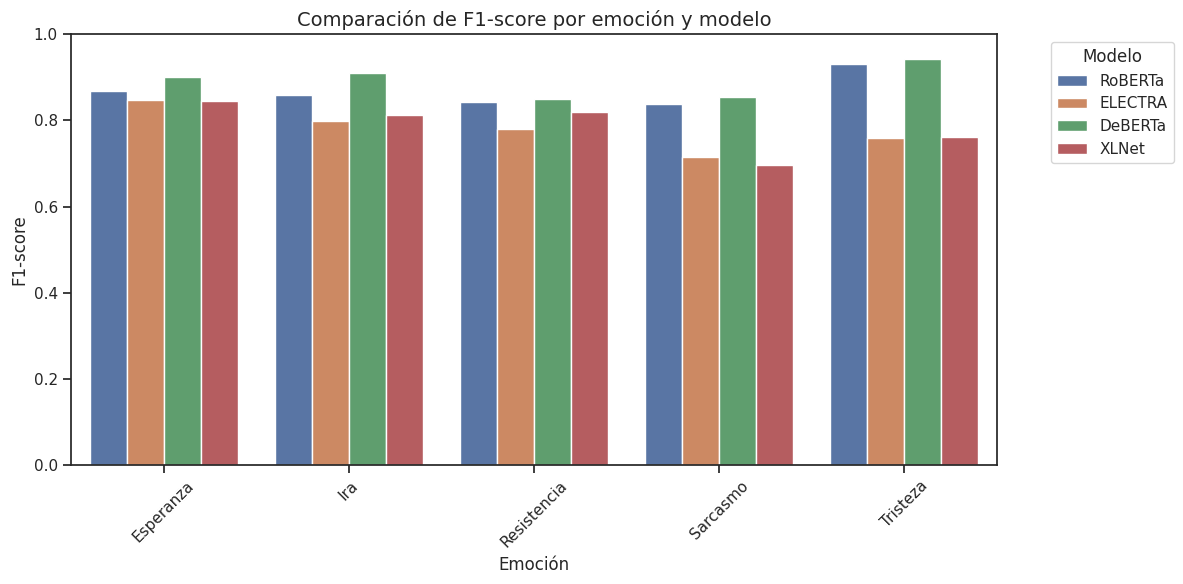

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def f1_por_emocion(nombre_modelo, archivo_test="Emociones_super_revisadas_test_II.xlsx", output_base="./resultados", seed=42, max_length=256):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    ruta_modelo = os.path.join(output_base, nombre_modelo)
    
    model = AutoModelForSequenceClassification.from_pretrained(ruta_modelo).to(device)
    tokenizer = AutoTokenizer.from_pretrained(ruta_modelo)

    df = pd.read_excel(archivo_test)
    label_encoder = LabelEncoder()
    df["label"] = label_encoder.fit_transform(df["emotion"])
    df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=seed)

    test_dataset = Dataset.from_pandas(df_test[["text", "label"]])
    tokenize_function = lambda e: tokenizer(e["text"], padding="max_length", truncation=True, max_length=max_length)
    tokenized_test = test_dataset.map(tokenize_function, batched=True)
    tokenized_test.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(model=model)
    predictions = trainer.predict(tokenized_test)
    y_true = predictions.label_ids
    y_pred = np.argmax(predictions.predictions, axis=1)

    report_dict = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)
    return {emotion: report_dict[emotion]["f1-score"] for emotion in label_encoder.classes_}, nombre_modelo

# ==== Ejecutar para todos los modelos ====
modelos = [
    
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "deberta_v3_base_optuna",
    "xlnet_base_cased_optuna"
]

resultados = []
for modelo in modelos:
    f1_scores, nombre = f1_por_emocion(modelo)
    for emocion, f1 in f1_scores.items():
        nombres_lindos = {
            
            "roberta_base_optuna": "RoBERTa",
            "electra_base_discriminator_optuna": "ELECTRA",
            "deberta_v3_base_optuna": "DeBERTa",
            "xlnet_base_cased_optuna": "XLNet"
        }
        
        resultados.append({
            "Modelo": nombre.replace("_optuna", "").replace("_base", "").replace("_discriminator", ""),
            "Emoción": emocion,
            "F1-score": f1
        })

df_f1 = pd.DataFrame(resultados)

# Reemplazar nombres para la leyenda final
df_f1["Modelo"] = df_f1["Modelo"].replace({
    
    "roberta": "RoBERTa",
    "electra": "ELECTRA",
    "deberta_v3": "DeBERTa",
    "xlnet_cased": "XLNet"
})
# ==== Gráfico profesional ====
plt.figure(figsize=(12, 6))
sns.set(style="ticks")
sns.barplot(data=df_f1, x="Emoción", y="F1-score", hue="Modelo")

plt.title("Comparación de F1-score por emoción y modelo", fontsize=14)
plt.ylabel("F1-score", fontsize=12)
plt.xlabel("Emoción", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


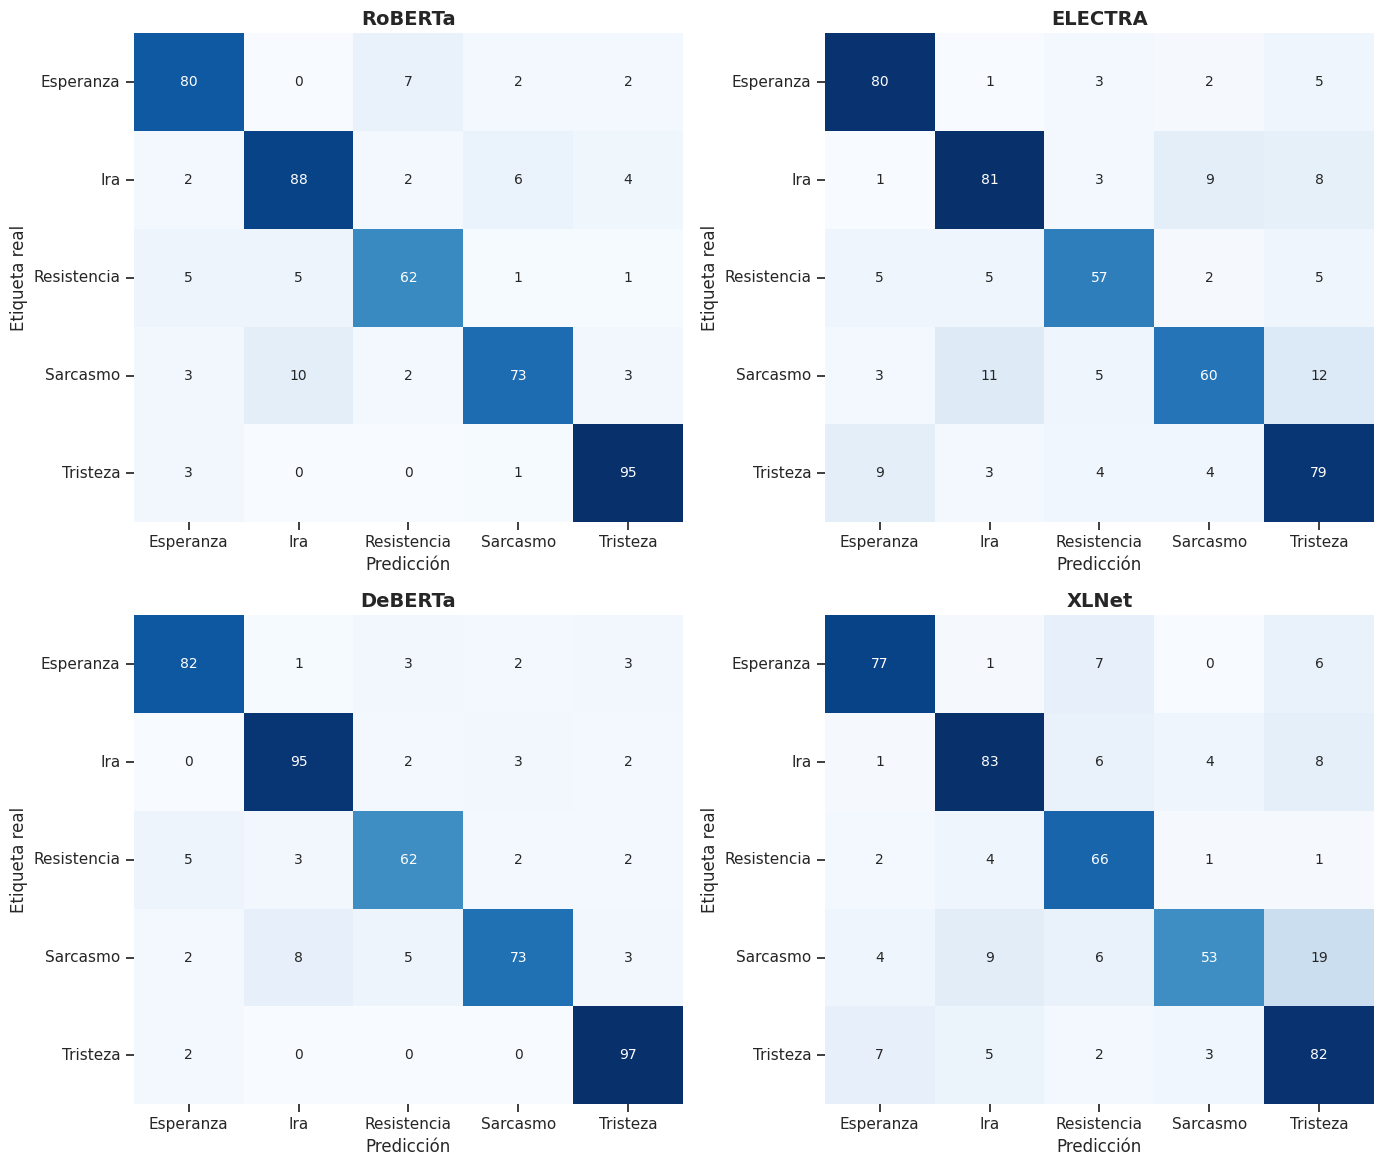

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Diccionario: modelo → nombre bonito
modelos = {
    
    "roberta_base_optuna": "RoBERTa",
    "electra_base_discriminator_optuna": "ELECTRA",
    "deberta_v3_base_optuna": "DeBERTa",
    "xlnet_base_cased_optuna": "XLNet"
}

# Cargar etiquetas reales y predichas
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (modelo, nombre_bonito) in enumerate(modelos.items()):
    # Cargar CSV
    path = f"./resultados/{modelo}/predicciones_test_{modelo}.csv"
    df = pd.read_csv(path)

    # Extraer etiquetas
    y_true = df["label"]
    y_pred = df["label_predicha"]
    labels = sorted(df["emocion_predicha"].unique())  # para orden alfabético

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Graficar
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels,
                ax=axes[i], cbar=False, annot_kws={"size": 10})
    
    axes[i].set_title(f"{nombre_bonito}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Predicción", fontsize=12)
    axes[i].set_ylabel("Etiqueta real", fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # sin inclinación
    axes[i].set_xticklabels(labels, rotation=0, ha="center")  # << ✅ ¡aquí está el fix!
    axes[i].tick_params(axis='y', rotation=0)
    
# Título general
plt.suptitle("", fontsize=16, weight="bold", y=0.93)
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd

modelos = {
    
    "roberta_base_optuna": "RoBERTa",
    "electra_base_discriminator_optuna": "ELECTRA",
    "deberta_v3_base_optuna": "DeBERTa",
    "xlnet_base_cased_optuna": "XLNet"
}

hiperparametros = []

for carpeta, nombre_bonito in modelos.items():
    ruta = f"./resultados/{carpeta}/optuna_mejor_config.txt"
    if os.path.exists(ruta):
        with open(ruta, "r") as f:
            lineas = f.readlines()
            config = {"Modelo": nombre_bonito}
            for linea in lineas:
                if ":" in linea and "Optuna" not in linea:
                    clave, valor = linea.strip().split(":", 1)
                    config[clave.strip()] = valor.strip()
            hiperparametros.append(config)
    else:
        print(f"⚠️ No se encontró archivo para {carpeta}")

# Convertir a DataFrame
df_hp = pd.DataFrame(hiperparametros)

# Reordenar columnas
cols = ["Modelo"] + [col for col in df_hp.columns if col != "Modelo"]
df_hp = df_hp[cols]

# Mostrar tabla
display(df_hp)


,Modelo,learning_rate,per_device_train_batch_size,num_train_epochs,weight_decay
0,RoBERTa,1.448130806611366e-05,16,5,0.035917651206719296
1,ELECTRA,2.0690887559282235e-05,8,6,0.054570843028739616
2,DeBERTa,1.1490977529237664e-05,8,6,0.06309090934349716
3,XLNet,2.4808082867805866e-05,8,5,0.03575882405488963


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import os

def predecir_emocion_frase(texto, modelos, output_base="./resultados", max_length=256):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    resultados = []

    for nombre_modelo in modelos:
        ruta = os.path.join(output_base, nombre_modelo)
        
        # Cargar modelo y tokenizer
        tokenizer = AutoTokenizer.from_pretrained(ruta)
        model = AutoModelForSequenceClassification.from_pretrained(ruta).to(device)
        model.eval()

        # Tokenizar texto
        inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding="max_length", max_length=max_length)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.softmax(outputs.logits, dim=1).cpu().numpy().flatten()

        # Obtener clases
        clases = model.config.id2label if hasattr(model.config, "id2label") and model.config.id2label else None
        if clases is None:
            clases = [str(i) for i in range(len(probs))]
            
        pred_id = np.argmax(probs)
        emocion = clases[pred_id]
        confianza = probs[pred_id]

        resultados.append({
            "Modelo": nombre_modelo.replace("_optuna", "").replace("_base", ""),
            "Emoción": emocion,
            "Confianza": round(confianza, 3)
        })

    return pd.DataFrame(resultados)


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("I stand with israel", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Resistencia,0.996
1,roberta,Resistencia,0.985
2,electra_discriminator,Resistencia,0.994
3,xlnet_cased,Resistencia,1.000


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("Free palestine", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Resistencia,0.995
1,roberta,Resistencia,0.970
2,electra_discriminator,Resistencia,0.993
3,xlnet_cased,Resistencia,0.992


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("The government is sucks!!", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Ira,0.998
1,roberta,Ira,0.972
2,electra_discriminator,Ira,0.995
3,xlnet_cased,Ira,1.000


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("Palestine will be free one day inshallah", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Esperanza,0.997
1,roberta,Esperanza,0.989
2,electra_discriminator,Esperanza,0.994
3,xlnet_cased,Esperanza,0.999


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("Let qatar help you guys haha", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Sarcasmo,0.998
1,roberta,Sarcasmo,0.986
2,electra_discriminator,Sarcasmo,0.993
3,xlnet_cased,Sarcasmo,0.994


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("I wish I could help those poor kids", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Tristeza,0.998
1,roberta,Tristeza,0.982
2,electra_discriminator,Tristeza,0.968
3,xlnet_cased,Esperanza,0.556


In [ ]:
modelos = [
    "deberta_v3_base_optuna",
    "roberta_base_optuna",
    "electra_base_discriminator_optuna",
    "xlnet_base_cased_optuna"
]

df_pred = predecir_emocion_frase("I hate that fucking state!!", modelos)
display(df_pred)


,Modelo,Emoción,Confianza
0,deberta_v3,Ira,0.998
1,roberta,Ira,0.982
2,electra_discriminator,Ira,0.995
3,xlnet_cased,Ira,0.988


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de las mejores épocas sin overfitting
data = {
    "Modelo": ["DeBERTa", "RoBERTa"],
    "Época": [2, 3],
    "F1 Macro": [0.856, 0.867],
    "Validation Loss": [0.515, 0.450]
}

df = pd.DataFrame(data)


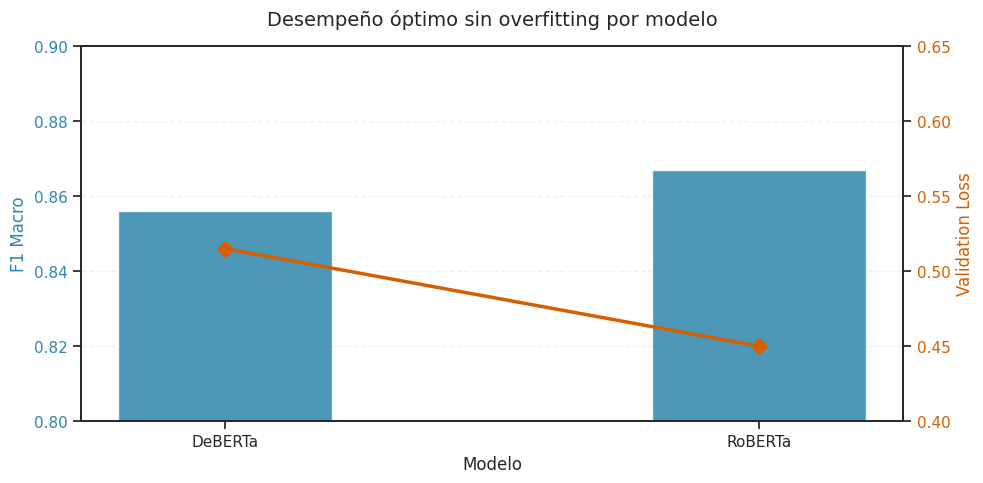

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# === Datos
data = {
    "Modelo": ["DeBERTa", "RoBERTa"],
    "F1 Macro": [0.856, 0.867],
    "Validation Loss": [0.515, 0.450]
}
df = pd.DataFrame(data)

# === Estilo profesional
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11
})

# === Colores elegantes
color_f1 = "#2E86AB"     # azul petróleo
color_loss = "#D55E00"   # naranja oscuro

# === Gráfico
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje izquierdo (F1 Macro)
ax1.bar(df["Modelo"], df["F1 Macro"], color=color_f1, alpha=0.85, width=0.4, label="F1 Macro")
ax1.set_ylabel("F1 Macro", color=color_f1)
ax1.set_ylim(0.8, 0.9)
ax1.tick_params(axis='y', labelcolor=color_f1)
ax1.set_xlabel("Modelo")

# Eje derecho (Validation Loss)
ax2 = ax1.twinx()
ax2.plot(df["Modelo"], df["Validation Loss"], color=color_loss, marker='D', markersize=8, linewidth=2.5, label="Validation Loss")
ax2.set_ylabel("Validation Loss", color=color_loss)
ax2.set_ylim(0.4, 0.65)
ax2.tick_params(axis='y', labelcolor=color_loss)

# Título y estilo
plt.title("Desempeño óptimo sin overfitting por modelo", pad=15)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Guardar o mostrar
plt.tight_layout()
plt.show()
